# How does closeness to a university affect housing affordability for students in New York?

Joyce Lin

## Table of Contents
- Introduction
- Part I
- Part II
- Part III
- Part IV
- Conclusion
- Citations

---
# Introduction

In mid-February 2024, a student at the University of British Columbia made headlines by commuting to Vancouver from his hometown Calgary every week by plane—all because monthly rent in Vancouver cost *more* than the cost of flying to and from Calgary every week for a month (Turner 2024).  The student's predicament is not an exception;  more and more students are finding it increasingly difficult to find housing for their studies, and this problem is hardly only limited to Canada.

Coming off of the COVID pandemic, housing prices—and by proxy, rent—have skyrocketed.  In the US, off campus rents increased by 28% from 2021 to 2022, from \\$1,614 USD to \\$2,062 USD per month (Perry 2023).  For college and university students who typically do not have a substantial and stable income, finding housing security close to their campus under such conditions would prove challenging.  While flying every week might be atypical for students, many have resorted to other methods to avoid rent such as sleeping in their cars.  Undoubtedly, the need for more affordable housing is a top priority among students.

This research paper seeks to analyze the impact of the vicinity of a university in New York state on housing affordability, with the goal of finding the relationship between higher education and housing prices, if it exists.  The state of New York has been chosen specifically due to the presence of numerous notable universities like NYU, Cornell University, and Colombia University.

The data analyzed includes **67,157 housing prices in New York collected from realtor.com** (2023), broken down by state and zip code.  Part 1 will be dedicated to analyzing this dataset in isolation.

The dependent variable for analysis is house price, and the price is the current listing price unless it has been recently sold, in which case the price is the recently sold price;  and the key independent variable is the vicinity to a notable university for a given house.  In this paper, the independent variable will be estimated by calculating the distance from the house's ZIP code centroid to the nearest university's coordinates, which are obtained from the **National Center for Education Statistics** (2024).  Part 2 will be dedicated to calculating the independent variable and analysis.

_**On the key independent variable, vicinity a notable university**_:  such a variable had been used in the past in similar works.

John A. Maluccio (1998) used distance to the nearest high school as an instrumental variable to estimate the effect of education on wages in the rural Philippines.  However, the primary methodology he used was panel data analysis, which is different from the scope of my paper.  Bingbing Wang (2023) used vicinity to a university as the indepedent variable in a difference-in-difference analysis in order to answer whether the COVID-19 outbreak impacted housing prices for university students in the US as a result of the forcible access to remote learning.

_**In order to truly test the effect of distance to a university on housing prices**_, other covariates could be used for analysis including:  house size, university rating, student population density, etc.  Part 3 will be dedicated to procuring and analyzing covariates.

Controlling for other variables, too, has been used frequently by other researchers.

Labor economist David Card (2001) studied various models and methods to measure the effect of education on labor market earnings.  His accounting for "institutional features" in the education system as exogenous is what inspired me to collect data on student population, tuition, estimated average GPA, among other information on universities in New York.  In addition to "institutional features", I also collected data on public schools to use as additional controls.

The "institutional features" on universities in New York is obtained from **simplycollege.com** (2024) via HTML webscraping, and public school data is collected from Homeland Infrastructure Foundation-Level Data (2019).

Part 4 will be dedicated to performing regression analysis on the housing data as well as all the other data collected from Parts 2 and 3.  The regression method is a popular method for analyzing correlational and causal relationships between variables, and has been used in a plethora of research.

Joachim Zietz et al. (2017) performed quantile regression analysis to determine causes for house prices, accounting for various variables including housing characteristics.  Sirmans et al. (2015), too, examined the impact of housing characteristics on housing prices critically, utilizing hedonic price models to more accurately capture the nuances of the effects that the characteristics may have on house price.

After combining all data, I found that many observations had missing values for key covariates that I intended to analyze.  However, due to the non-uniform and non-linear nature of the relationship between my Y and X variables, a simple average of the missing values will be grossly inaccurate.

An approach to account for less predictable data such as this include utilizing a method developed by Wei Jiang and the Trauma Group based on the stochastic approximation of the EM algorithm (SAEM) (Jiang et al., 2020;  Celeux et al, 1992).  Another approach is imputing data based on the k-nearest-neighbors (K-NN) approach, a method that compares similarities between existing data in order to allow for filling in the missing values with most similar "neighboring" values.  Other approaches include the one neighbor approach (1NN) (Beretta 2016).  Unfortunately, due to hardware limitations, I found it incredibly difficult to implement these methods.

Instead, I performed limited OLS estimates of my y-variable on existing values of a given covariate and fitted any missing values according to the estimate, logarithmically transforming variables where needed to maintain linearity.  This method has the major issue of over-emphasizing the relationship between the price and the covariate in question, which could make my data prone to overfitting.  All results from this paper should be considered with that fact in mind.

Analysis reveals that university proximity is indeed significantly correlated with housing price, but so are all other variables such as the number of bedrooms and bathrooms, density of public schools in the area, house and acre size, acceptance rate of the nearest university, etc.  No doubt housing price is a complex value that is influenced by a plethora of factors.  Without an instrumental variable analysis, it will be difficult to discern the causal effect of university proximity on house price.

---
# Part I

Part I is concerned strictly with the data obtained from realtor.com.  In this part, it is important to note that I lack access to university data in New York.  Additionally, maps will be excluded from Part I.

Instead, I will focus on dissecting this dataset. Familiarizing oneself with the dataset is crucial, as it reveals the limits of this dataset. This will help me answer the question of "what other data do I need?" as well as establish a clearer direction for this research project.

Below is a summary of what Part I will consist of:
1. **Data cleaning**
2. **Summary Statistics: Pre-Data Cleaning**
3. **Plots, Histograms, Figures: Pre-Data Cleaning**
4. **Summary Statistics: Post-Data Cleaning**
5. **Plots, Histograms, Figures: Post-Data Cleaning**

## Data cleaning

The data will be cleaned of observations without a price, as that variable is required for analysis in this particular subject.  Additionally, duplicates will be dropped.  Then, the data will be filtered to only include entries from New York.

In [2]:
# Installation
# ! pip install -q nbconvert pyppeteer qeds fiona geopandas xgboost gensim folium pyLDAvis descartes geodatasets tabulate matplotlib scipy linearmodels stargazer
# Part I
import matplotlib
import matplotlib.colors as mplc
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tabulate import tabulate
import statsmodels.formula.api as sm #for linear regression: sm.ols
# Part II
import geopandas as gpd
from pandas_datareader import DataReader
from shapely.geometry import Point
import geopandas
from geodatasets import get_path
import scipy
from scipy.spatial.distance import cdist
from scipy.stats import linregress
%matplotlib inline
# Part III
from bs4 import BeautifulSoup
import requests
import re
# Part IV
import statsmodels.api as sm
from statsmodels.iolib.summary2 import summary_col
from stargazer.stargazer import Stargazer, LineLocation
from IPython.core.display import HTML
from sklearn.impute import KNNImputer
from sklearn import tree, metrics
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error,confusion_matrix, classification_report
# activate plot theme
import qeds

In [2]:
# defining a function to set an ax's top and right borders AND altering the tick labels.  Will use this if tick labels are too large
def aesthetics(n):
    n.spines['right'].set_visible(False)
    n.spines['top'].set_visible(False)
    n.ticklabel_format(style='plain', axis='x')
    n.set_xticklabels(n.get_xticklabels(), rotation=45)

# defining a function to set an ax's top and right borders ONLY
def aesthetics1(n):
    n.spines['right'].set_visible(False)
    n.spines['top'].set_visible(False)

# also set the display parameters for summary statistic tables to prevent scientific notation
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [3]:
data_raw = pd.read_csv("realtor-data.csv")

In [4]:
# because price is our dependent variable, each observation must have a price to be analyzed.
data_raw = data_raw.dropna(subset=["price"])
# also dropping duplicates
data_raw = data_raw.drop_duplicates()
data_raw.describe()

,bed,bath,acre_lot,zip_code,house_size,price
count,126773.00,128499.00,115074.00,151974.00,102552.00,152020.00
mean,3.38,2.50,26.35,9376.00,2163.86,858281.19
std,1.89,1.71,1126.87,4420.67,5296.27,3097909.15
min,1.00,1.00,0.00,601.00,4.00,0.00
25%,2.00,2.00,0.11,6776.00,1176.00,225000.00
50%,3.00,2.00,0.28,10011.00,1688.00,425000.00
75%,4.00,3.00,1.17,11932.00,2496.00,785000.00
max,123.00,198.00,100000.00,99999.00,1450112.00,875000000.00


In [5]:
data_raw.describe(include='object')

,status,city,state,prev_sold_date
count,152020,151985,152020,79419
unique,2,3512,19,10319
top,for_sale,New York City,New York,2022-04-15
freq,151743,8162,67157,68


According to the summary statistics table after dropping observations without a price, there are 152,020 observations.  This is rather concerning as prior to filtering, there were 1.4 million observations in the dataset used.  The cause for so many duplicates to be dropped could range from innocuous to alarming:  the same house was recollected multiple times, or different houses with the same bed, bath, price etc. were accidentally removed due to not having any other discernible traits.

The dataset includes information on the price, which again is the current listing price unless it has been recently sold, in which case the price is the recently sold price;  the number of bathrooms (bath) and bedrooms (bed);  the size of the plot the house sits on (acre_lot);  and the size of the house itself.  Previous sold date (prev_sold_date) and status of the house (status) are also included, but it has significantly less entries than the other fields.  Geographical data on each house is recorded in the city, state, and zip code.  The most frequently occurring city in this dataset is New York City, and the most common state is New York.  This is perfect for our analysis, because we will only be looking at housing prices in New York for our study.  However, this current data set only has data on houses, not the universities, of which data will be obtained in Part 2.  In the next section, the dataset will be filtered to only include entries from New York state.

## Summary Statistics:  Pre-Data Cleaning

The summary statistic table below displays the counts, means, standard deviations, and other values for fields in the dataset that contain integer or float values, after filtering for houses in New York only.  After filtering, 67,157 entries are left, which means about 500,000 entries were filtered out of the dataset.

All values (except ZIP code, but the numeric interpretation of zip codes here is meaningless) appear to have a right skew, judging by the large standard deviation compared to the mean as well as the max value compared to the 75% percentile values and below.  This suggests the possibility of two things:  1) a positively skewed dataset or 2) the estates with those maximum values are outliers.  This section will primarily focus on data-cleaning and removing observations that do not fit with the research question (e.g. are too big/expensive).  The analysis will come after.

**Note**:  I took extra steps to keep observations with certain missing fields.  Because these fields are not the focus of my data, I see no point in filtering observations out just because they have these missing fields, as long as they have a listed price.

In [6]:
# Filter out data to only include New York
data_nyonly = data_raw[data_raw["state"] == "New York"]
data_nyonly.describe()

,bed,bath,acre_lot,zip_code,house_size,price
count,55688.00,58115.00,44641.00,67141.00,44599.00,67157.00
mean,3.28,2.40,38.70,11739.72,2076.18,1157569.36
std,2.09,1.74,1309.25,1375.24,2743.29,4455579.42
min,1.00,1.00,0.00,4715.00,4.00,0.00
25%,2.00,1.00,0.11,10916.00,1100.00,230000.00
50%,3.00,2.00,0.27,11542.00,1638.00,529000.00
75%,4.00,3.00,1.29,12578.00,2421.00,999000.00
max,123.00,123.00,100000.00,99999.00,352836.00,875000000.00


## Data Cleaning:  Dropping Outliers

**Pricing**

According to the summary statistics table above, the mean price is 1,157,569.36 USD and the standard deviation is 4,455,579.42 USD.  This is a *massive* degree of variation.

There appears to be a sharp drop roughly at the 15,000,000 USD mark (from thousands of observations to 40 or fewer observations in each bin).  Due to the *extremity* of the outliers and the unlikelihood that such an expensive house is something a university student will look for, they will be dropped.

In [7]:
# dropping the abnormally high housing price
data_nyonly = data_nyonly[data_nyonly["price"] <= 15000000]

**Bed & Bath**

The mean is 3.28 and 2.40 for the number of bedrooms and bathrooms respectively in New York, and the standard deviation is 2.09 and 1.74.  All values for the 75% percentile downward are close to the mean, but the maximums for both variables deviate significantly, coming to 75 and 64 for bedrooms and bathrooms respectively.

The argument could be made that houses with over five bathrooms and bedrooms should be dropped;  however, dropping houses between five to ten bedrooms or bathrooms would exclude thousands of entries.  Additionally, university students may still find larger bedroom or bathroom houses suitable for living together in a co-op dormitory style.  Thus, it would make sense to filter out only the data points with more than 10 bedrooms or bathrooms.

In [8]:
data_nyonly = data_nyonly[(data_nyonly['bed'].isna() | 
                           (data_nyonly['bed'] <= 10)) & 
                           (data_nyonly['bath'].isna() | 
                            (data_nyonly['bath'] <= 10))]

**House Size**

The mean house size is 2076.18 square feet, with a standard deviation of 2743.29.  The size of the standard deviation in relation to the mean indicates a significant spread.

There is a sharp drop in observations roughly at the 7,500 square feet mark, after which the majority of the bins have less than 40 observations.  Once again keeping the focus of this research paper in mind, houses above 7,500 square feet are unlikely to be the target for a university student's needs.  Therefore, these observations will be dropped.

In [9]:
data_nyonly = data_nyonly[(data_nyonly['house_size'].isna() | 
                           (data_nyonly['house_size'] <= 7500))]

**Acre Size**

The mean acre size is 6.02 acres, with a standard deviation of 26.07.  Such a huge standard deviation in relation to the mean indicates significant spread.  And given that the maximum value is 100,000, as well as the quartile value up to 75% being so small compared to the mean, there may exist severe positive skew or outliers.

There is not only a positive skew, there is also a significant drop past the 200 acre mark, from well above 40 observations per bin to less than 25 observations.  Given the small amount of observations at such a large size, dropping these outliers make sense.

In [10]:
data_nyonly = data_nyonly[(data_nyonly['acre_lot'].isna() | 
                           (data_nyonly['acre_lot'] <= 200))]

## Summary Statistics:  Post-Data Cleaning

In [11]:
data_nyonly["price (1m)"]=data_nyonly["price"] / 1000000

In [12]:
data = data_nyonly
exclude_columns = ["price (1m)"]
descriptive_data = data.drop(columns=exclude_columns).describe()
descriptive_data

,bed,bath,acre_lot,zip_code,house_size,price
count,54310.00,56742.00,43432.00,65504.00,43292.00,65520.00
mean,3.14,2.28,4.48,11744.04,1871.35,932715.92
std,1.59,1.28,16.50,1378.13,1118.13,1443435.31
min,1.00,1.00,0.00,4715.00,4.00,0.00
25%,2.00,1.00,0.10,10925.00,1089.00,228725.00
50%,3.00,2.00,0.26,11542.00,1600.00,519000.00
75%,4.00,3.00,1.20,12583.00,2340.00,975000.00
max,10.00,10.00,200.00,99999.00,7500.00,15000000.00


A total of 1,637 outliers were dropped after the data cleaning.

In all the fields (except bedroom count), the final results show a positively skewed trend.  In addition to the fact that all the outliers dropped in the data-cleaning stage were outliers that were significantly greater than the mean, these characteristics line up with the average housing market, where the majority of houses are modest sizes and cater to the middle-class, with the opulently wealthy being able to afford dramatically larger and pricier estates.

## Plots, Histograms, Figures:  Post-Data Cleaning

C:\Users\fuzzi\AppData\Local\Temp\ipykernel_12732\376664752.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  n.set_xticklabels(n.get_xticklabels(), rotation=45)


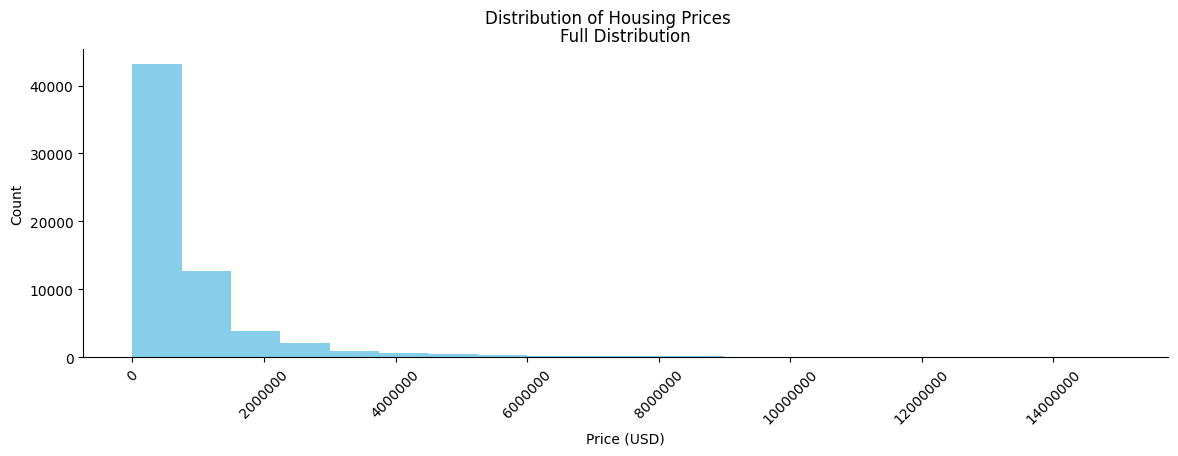

In [13]:
fig, ax1 = plt.subplots(figsize=(14, 4))
# full distribution, at full height
data["price"].plot(
    kind="hist", 
    xlabel="Price (USD)", 
    ylabel="Count",
    color="skyblue",
    bins=20, 
    legend=False, 
    density=False, 
    ax=ax1
)
fig.suptitle("Distribution of Housing Prices")
ax1.set_title("Full Distribution")
aesthetics(ax1);

Although still positively skewed, the distribution is slightly more even after data cleaning, with the maximum price being at 14 million USD rather than at 875 million USD.  This result is not surprising, considering that the bulk of residences in the average housing market typically lean towards modest dimensions, without excessive luxury or space, which would make the excessively expensive houses outliers by comparison.

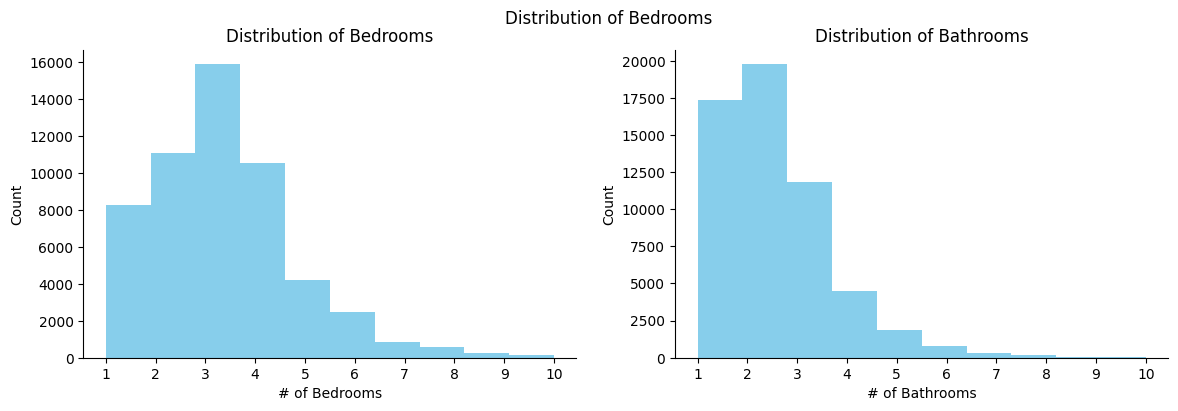

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))
# capped distribution for bedrooms
data["bed"].plot(
    kind="hist",
    xlabel="# of Bedrooms",
    ylabel="Count",
    color="skyblue",
    bins=10, 
    legend=False, 
    density=False, 
    ax=ax1
)
# capped distribution for bathrooms
data["bath"].plot(
    kind="hist", 
    xlabel="# of Bathrooms", 
    ylabel="Count",
    color="skyblue",
    bins=10, 
    legend=False, 
    density=False, 
    ax=ax2
)
ax1.xaxis.set_major_locator(plt.MaxNLocator(integer=True))
ax2.xaxis.set_major_locator(plt.MaxNLocator(integer=True))
fig.suptitle("Distribution of Bedrooms")
ax1.set_title("Distribution of Bedrooms")
ax2.set_title("Distribution of Bathrooms")
aesthetics1(ax1)
aesthetics1(ax2);

Ultimately, the result is a positively skewed but normal distribution for bedroom and bathroom counts.  Such a distribution is expected, as the majority of houses can have two or three bedrooms, but would only require one or two bathrooms.  This trend aligns with the common housing needs of the average person, including university students, who typically do not require more than a few bedrooms and bathrooms. Therefore, the filtering process helps refine the dataset to focus on more relevant housing options and representative of the target demographic's preferences and needs.

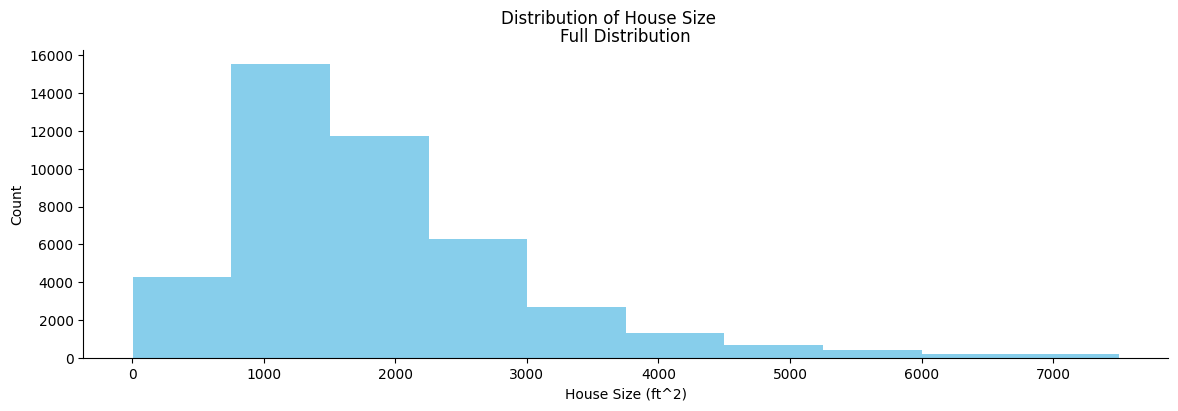

In [15]:
fig, ax1 = plt.subplots(figsize=(14, 4))
# full distribution, at full height
data["house_size"].plot(
    kind="hist", 
    xlabel="House Size (ft^2)", 
    ylabel="Count",
    color="skyblue",
    bins=10, 
    legend=False, 
    density=False, 
    ax=ax1
)
fig.suptitle("Distribution of House Size")
ax1.set_title("Full Distribution")
aesthetics1(ax1);

After taking out the larger house sizes,, the dataset reveals a distribution that is positively skewed but still looks fairly normal. This distribution is expected, as once again the majority of houses tend to be modestly sized, catering to the needs of average individuals, including university students.  They're not too small either (hence the normal distribution), since very tight spaces might not appeal to buyers.

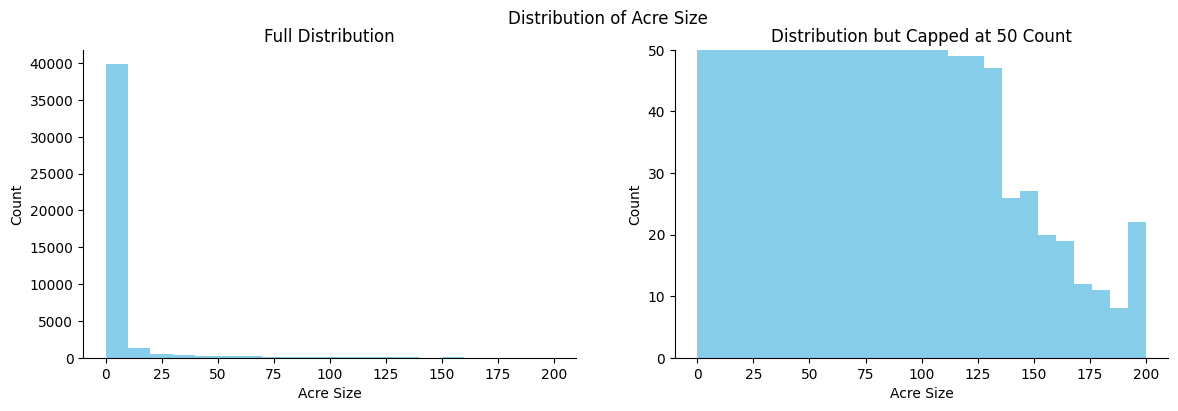

In [16]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))
# full distribution, at full height
data["acre_lot"].plot(
    kind="hist", 
    xlabel="Acre Size", 
    ylabel="Count",
    color="skyblue",
    bins=20, 
    legend=False, 
    density=False, 
    ax=ax1
)
# capped distribution to more clearly count the number of occurrence
# in the outlier bins
data["acre_lot"].plot(
    kind="hist", 
    xlabel="Acre Size", 
    ylabel="Count",
    color="skyblue",
    bins=25, 
    legend=False, 
    density=False, 
    ax=ax2
)
ax2.set_ylim(0, 50) # set y-axis limits
fig.suptitle("Distribution of Acre Size")
ax1.set_title("Full Distribution")
ax2.set_title("Distribution but Capped at 50 Count")
aesthetics1(ax1)
aesthetics1(ax2);

After removing outliers in acre size, the dataset reveals a heavily positively skewed distribution, with properties of over rougnly 150 acres almost seeming like outliers. Despite the heavy positive skew, this distribution is expected, as there may exist a select few houses in more rural areas with large acre sizes.

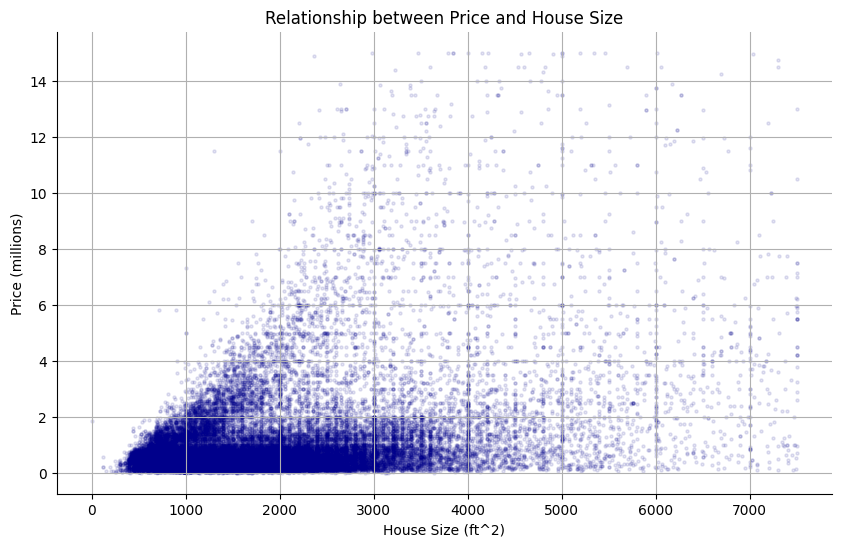

In [17]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# Scatter plot for housing price vs. house size
ax1.scatter(data['house_size'], 
    data['price (1m)'], 
    color='darkblue', 
    alpha=0.1, 
    s=5)
ax1.set_title('Relationship between Price and House Size')
ax1.set_xlabel('House Size (ft^2)')
ax1.set_ylabel('Price (millions)')
ax1.grid(True)

# Disable scientific notation for the y-axis (price)
ax1.ticklabel_format(style='plain', axis='y')

# Adjust layout
aesthetics1(ax1)

plt.show();

The graph above plots the relationship between house size and housing prices in New York.  The most striking feature of the graph is the fan-like variation that it possesses:  the larger the house, the more *variation* can be seen in the house prices, but the cheapest larger house can cost just as less as a smaller house.  Only a few outliers deviate from the trend, but otherwise, the upper bound for housing prices based on size seems to increase by about 35,000,000 per 1000 square feet.  The heteroskedastic variation may suggest that there exists a significant factor outside of house size that impacts housing prices, but perhaps those other factors are also correlated with house size.  For example, larger houses may have access to attributes that inflate their price, but not all large houses have it.

c:\Users\fuzzi\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


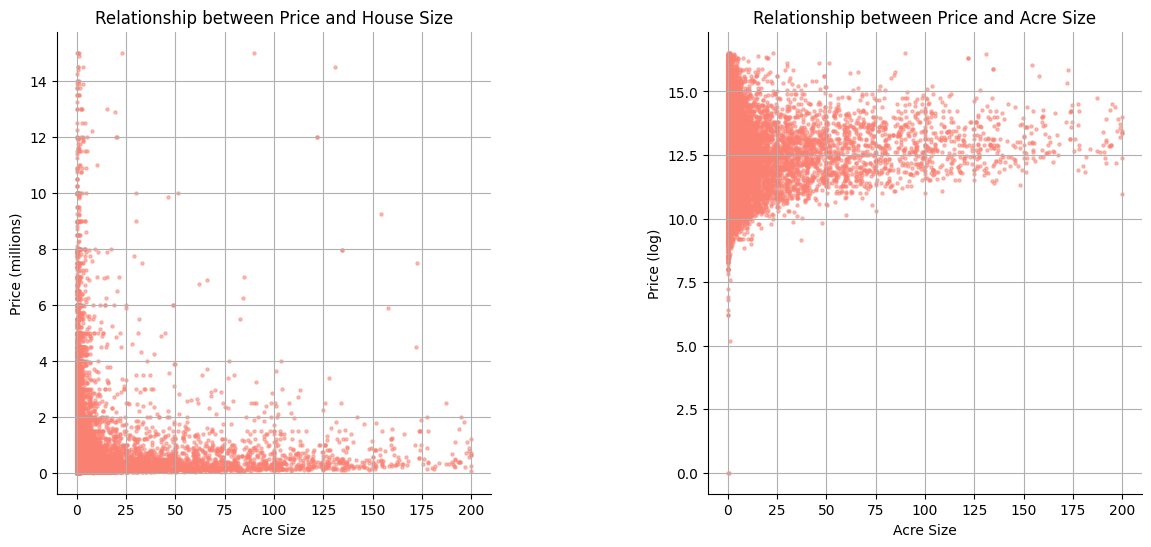

In [18]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Scatter plot for housing price vs. house size
ax1.scatter(data['acre_lot'], 
    data['price (1m)'], 
    color='salmon', 
    alpha=0.5, 
    s=5)
ax1.set_title('Relationship between Price and House Size')
ax1.set_xlabel('Acre Size')
ax1.set_ylabel('Price (millions)')
ax1.grid(True)

data["price_log"] = np.log(data["price"])
# Scatter plot for housing price vs. acre size
ax2.scatter(data['acre_lot'], 
    data['price_log'], 
    color='salmon', 
    alpha=0.5, 
    s=5)
ax2.set_title('Relationship between Price and Acre Size')
ax2.set_xlabel('Acre Size')
ax2.set_ylabel('Price (log)')
ax2.grid(True)

# Disable scientific notation for the y-axis (price)
ax1.ticklabel_format(style='plain', axis='y')
ax2.ticklabel_format(style='plain', axis='y')

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.5)

# Adjust layout
aesthetics1(ax1)
aesthetics1(ax2)

plt.show();

The graphs above plots the relationship between the size of the plot for the house and housing prices in New York.  The relationship described could hardly be called linear, and logging price shows that there is in fact a near zero correlation between acre size and price.  Instead, there is considerably more variation between houses with smaller acre sizes than those with larger acre sizes.

This suggests that acre size has little impact on housing prices, or that there exists many  more factors that influence housing prices, such as vicinity to a city, local crime rates, etc.

In [19]:
# Group the housing DataFrame by city and count the number of houses in each city
city_counts = data.groupby('city').size().reset_index(name='house_count')

# Sort the resulting DataFrame by the count of houses in descending order
city_counts = city_counts.sort_values(by='house_count', ascending=False)
city_counts_top10 = city_counts.head(10)

# Display the sorted city house counts table
print(tabulate(city_counts_top10, headers='keys', tablefmt='pretty'))

+------+---------------+-------------+
|      |     city      | house_count |
+------+---------------+-------------+
| 983  | New York City |    7909     |
| 982  |   New York    |    5017     |
| 161  |   Brooklyn    |    4642     |
| 156  |     Bronx     |    1578     |
| 1374 | Staten Island |    1557     |
| 171  |    Buffalo    |     836     |
| 491  |   Flushing    |     779     |
| 846  |   Manhattan   |     694     |
| 1403 |   Syracuse    |     687     |
| 708  |    Jamaica    |     602     |
+------+---------------+-------------+


Unsurprisingly, the location with the highest number of houses is New York City, with 7,909 observations.  The city with the second highest number of houses is also "New York," oddly enough.  "New York" may be different from New York City such that "New York" refers to the areas surrounding New York City itself.

With the dataset reasonably familiarized, we will move onto Part II.

In [20]:
data.to_csv("FRE1.csv", index=False)

---
# Part II
Below is a summary of what Part II will consist of:
1. **The Message**
2. **Data Cleaning + Data Information**
3. **Maps**
4. **Plots, Histograms, Figures:  Distance to University**

## The Message

Generally, there is a strong negative correlation between distance to a university and housing prices.  The variation also increases as the distance to a university decreases.

In [32]:
FRE2 = pd.read_csv("FRE2.csv")

c:\Users\fuzzi\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


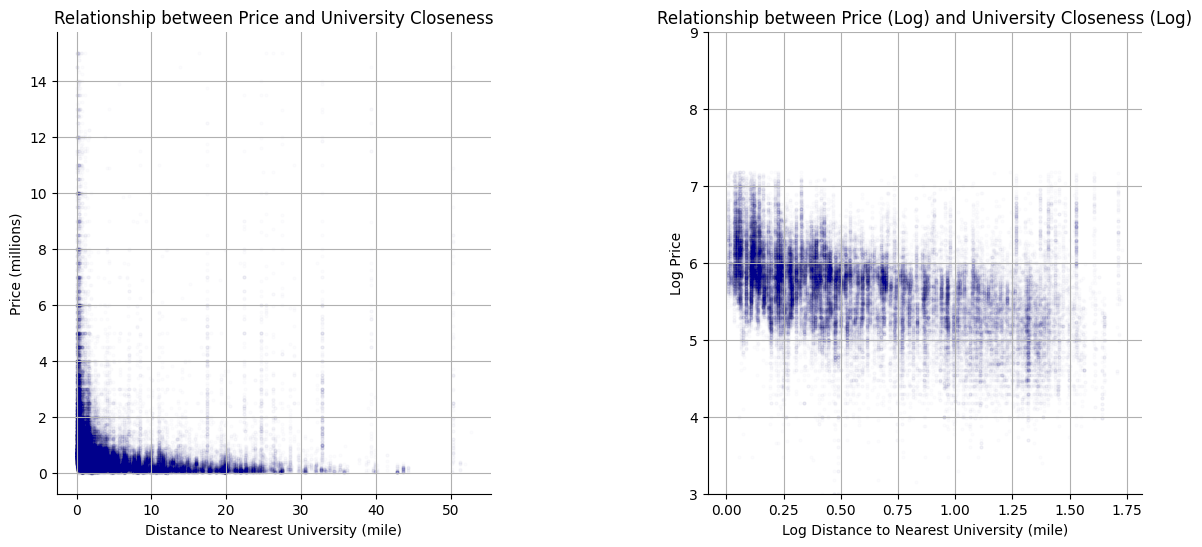

In [33]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
ax1.scatter(FRE2['nearest_uni_distance_in_miles'], 
    FRE2['price (1m)'], 
    color='darkblue', 
    alpha=0.01, 
    s=5)
ax1.set_title('Relationship between Price and University Closeness')
ax1.set_xlabel('Distance to Nearest University (mile)')
ax1.set_ylabel('Price (millions)')
ax1.grid(True)

x = np.log10(FRE2['nearest_uni_distance_in_miles'] + 1)
y = np.log10(FRE2['price'])

ax2.scatter(x, 
    y, 
    color='darkblue', 
    alpha=0.01, 
    s=5)
ax2.set_title('Relationship between Price (Log) and University Closeness (Log)')
ax2.set_xlabel('Log Distance to Nearest University (mile)')
ax2.set_ylabel('Log Price')
ax2.grid(True)

# Disable scientific notation for the y-axis (price)
ax1.ticklabel_format(style='plain', axis='y')
ax2.ticklabel_format(style='plain', axis='y')

ax2.set_ylim(3, 9)# set axis limits

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.5)

# Adjust layout
aesthetics1(ax1)
aesthetics1(ax2)

plt.show();

Based on the observed data, it's apparent that proximity to a university does in fact correlate negatively with housing prices.  After applying a logarithmic transformation reveals an interesting trend when houses are extremely close to a university:  when a house is closer to a university, the lower limit of price variation increases. This suggests that closeness to a university may exert a distinct influence on housing prices, warranting further investigation into the underlying factors driving this relationship.

In addition, houses appear to be significantly more concentrated in areas closer to universities, as evidenced by the density of housing units to the left side of the graphs compared to the right side.

Finally, the data exhibits a heteroskedastic variability in house prices as the distance to a university decreases.  Perhaps this higher variation is dependent on other factors, such as the quality of the university that a house is close to, which can exacerbate the impact on house prices.

## Data Cleaning + Data Information

**On the extra data I will be bringing in:**

The shapefiles for New York state as well as for US zip codes are obtained from the US Census.  The coordinates for the top 12 most populated cities in New York is obtained from simplemaps.com.

The latitude and longitude data for the zip codes in the US is obtained from simplemaps.com.  Note that the zip code location in this dataset is given as a point, rather than a shape file.
- Caveat:  the "latitude" and "longitude" of zip codes is the centroid of a given zip code region.  I will also assume that the latitude and longitude given is a sufficient approximation, as I require a point to be able to calculate distances later on.
- The zip code data from simplemaps.com also includes other fields, such as population density, timezone, county weights, etc.  Some of these fields may come in handy in future parts.

The data on the coordinates for universities in New York is obtained from the National Center for Educational Statistics website.

- The original dataset contained universities from the entirety of the United States;  after filtering to only including universities from New York, the dataset now only includes 425 universities.

Firstly, the zip codes for the housing prices dataset will be cleaned.  This is to ensure that the format for the zip codes is uniform so that merging can be done properly.

In [3]:
# Zip code cleaning for housing data
data = pd.read_csv("FRE1.csv")
data_copy = data.copy()
data_zips_cleaned = data_copy.dropna(subset=["zip_code"])
data_zips_cleaned['zip_code'] = data_zips_cleaned['zip_code'].astype(str)
data_zips_cleaned['zip_code'] = data_zips_cleaned['zip_code'].apply(lambda x: x[:-2] if x.endswith('.0') else x)
# No need to fill in leading zeroes because the zip code dataframe also does not have leading zeroes

C:\Users\fuzzi\AppData\Local\Temp\ipykernel_17252\4247198606.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_zips_cleaned['zip_code'] = data_zips_cleaned['zip_code'].astype(str)
C:\Users\fuzzi\AppData\Local\Temp\ipykernel_17252\4247198606.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_zips_cleaned['zip_code'] = data_zips_cleaned['zip_code'].apply(lambda x: x[:-2] if x.endswith('.0') else x)


The shapefile for New York, top city coordinates, as well as the zip code centroid datasets will be filtered and cleaned.  For the zip code centroids and the top 10 city locations, the latitude and longitudes will need to be converted into a geodataframe.

In [4]:
ny_df = gpd.read_file("tl_2023_us_state.shp")
ny_df = ny_df[ny_df["STUSPS"] == "NY"]
ny_df = ny_df.to_crs('EPSG:4326')

In [5]:
zips_points_df = pd.read_csv("uszips.csv")
zips_points_df = zips_points_df[zips_points_df["state_id"] == "NY"]
zips_points_df['zip'] = zips_points_df['zip'].astype(str)

In [6]:
# Create a geometry column containing Point objects representing the latitude and longitude coordinates
geometry = [Point(xy) for xy in zip(zips_points_df['lng'], 
                                    zips_points_df['lat'])]
# Create a GeoDataFrame from the DataFrame
zips_points_gdf = gpd.GeoDataFrame(zips_points_df, geometry=geometry, crs="EPSG:4326")

In [7]:
selected_columns = ['zip', 'lat', 'lng', 'population', 'density', 'geometry']
zips_points_gdf = zips_points_gdf[selected_columns]

In [8]:
city_points_df = pd.read_csv("simplemaps.csv")

In [9]:
# Create a geometry column containing Point objects representing the latitude and longitude coordinates
geometry = [Point(xy) for xy in zip(city_points_df['lng'], 
                                    city_points_df['lat'])]
# Create a GeoDataFrame from the DataFrame
city_points_gdf = gpd.GeoDataFrame(city_points_df, geometry=geometry, crs="EPSG:4326")

Now, the data on university coordinates will need to be filtered and converted into a geodataframe.

In [10]:
unis_df = pd.read_csv("uni-locations.csv", encoding='latin1')
unis_df = unis_df[unis_df['STABBR'] == 'NY']

In [11]:
# Create a geometry column containing Point objects representing the latitude and longitude coordinates
geometry = [Point(xy) for xy in zip(unis_df['LONGITUD'], unis_df['LATITUDE'])]
# Create a GeoDataFrame from the DataFrame
unis_gdf = gpd.GeoDataFrame(unis_df, geometry=geometry, crs="EPSG:4326")

The zip code latitude and longitudes will now be merged into the housing prices dataset, such that each house will have a corresponding zip code based on their zip code.

In [12]:
# Merge the housing data with the zip code data based on the zip code column
data_latlon = pd.merge(data_zips_cleaned, zips_points_df[['zip', 'lat', 'lng']], 
                               left_on='zip_code', right_on='zip', how='left')

In [13]:
# Create a geometry column containing Point objects representing the latitude and longitude coordinates
geometry = [Point(xy) for xy in zip(data_latlon['lng'], data_latlon['lat'])]

# Create a GeoDataFrame from the DataFrame
data_latlon_gdf = gpd.GeoDataFrame(data_latlon, geometry=geometry, crs="EPSG:4326")

### Calculating Distance to Nearest University
In this sub section I will be 1) identifying the nearest university to a given house i and 2) calculating the nearest distance from house i to that university.

In [14]:
# Renaming columns
data_latlon_gdf = data_latlon_gdf.rename(columns={'lat': 'house_lat', 'lng': 'house_lng'})
unis_gdf = unis_gdf.rename(columns={'lat': 'uni_lat', 'lng': 'uni_lng'})

In [15]:
# Extract house coordinates
house_coords = data_latlon_gdf[['house_lat', 'house_lng']].to_numpy()

# Correct the column names in unis_gdf_reduced to match the renamed columns for latitude and longitude
unis_gdf = unis_gdf.rename(columns={'LONGITUD': 'uni_lng', 'LATITUDE': 'uni_lat'})

# Extract university coordinates
uni_coords = unis_gdf[['uni_lat', 'uni_lng']].to_numpy()

In [16]:
# Calculate distances between each house and every university
distances = cdist(house_coords, uni_coords, metric='euclidean')

# Find the index of the nearest university for each house
nearest_uni_indices = np.argmin(distances, axis=1)

# Get the corresponding distance to the nearest university
nearest_distances = np.min(distances, axis=1)

# Get the name and geometry of the nearest university
nearest_uni_names = unis_gdf.iloc[nearest_uni_indices]['INSTNM'].values

# Add the nearest university information back to the housing GeoDataFrame
data_latlon_gdf['nearest_uni_name'] = nearest_uni_names
data_latlon_gdf['nearest_uni_distance_in_degrees'] = nearest_distances

# Convert distances from degrees to miles (assuming 1 degree ≈ 69 miles)
data_latlon_gdf['nearest_uni_distance_in_miles'] = data_latlon_gdf['nearest_uni_distance_in_degrees'] * 69

# Display the closest distance for each house
data_latlon_gdf.head(3)

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price,price (1m),price_log,zip,house_lat,house_lng,geometry,nearest_uni_name,nearest_uni_distance_in_degrees,nearest_uni_distance_in_miles
0,for_sale,3.00,1.00,60.00,Berlin,New York,12022,1176.00,NaN,175000.00,0.17,12.07,12022,42.67,-73.33,POINT (-73.33401 42.66653),Rensselaer Polytechnic Institute,0.35,24.04
1,for_sale,3.00,2.00,2.02,Claverack,New York,12521,1600.00,2021-11-24,425000.00,0.42,12.96,12521,42.17,-73.65,POINT (-73.65164 42.17071),Columbia-Greene Community College,0.17,11.93
2,for_sale,4.00,2.00,0.24,Copake,New York,12521,1239.00,2018-02-01,225000.00,0.23,12.32,12521,42.17,-73.65,POINT (-73.65164 42.17071),Columbia-Greene Community College,0.17,11.93


In [17]:
data_latlon_gdf.describe()

c:\Users\fuzzi\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,bed,bath,acre_lot,house_size,price,price (1m),price_log,house_lat,house_lng,nearest_uni_distance_in_degrees,nearest_uni_distance_in_miles
count,54307.00,56736.00,43418.00,43289.00,65504.00,65504.00,65504.00,65438.00,65438.00,65438.00,65438.00
mean,3.14,2.28,4.47,1871.31,932850.40,0.93,-inf,41.53,-74.33,0.07,5.17
std,1.59,1.28,16.48,1118.15,1443574.13,1.44,NaN,1.09,1.29,0.11,7.34
min,1.00,1.00,0.00,4.00,0.00,0.00,-inf,40.51,-79.43,0.00,0.01
25%,2.00,1.00,0.10,1089.00,229000.00,0.23,12.34,40.73,-74.15,0.01,0.66
50%,3.00,2.00,0.26,1600.00,519000.00,0.52,13.16,40.84,-73.95,0.03,1.85
75%,4.00,3.00,1.20,2340.00,975000.00,0.97,13.79,42.52,-73.79,0.09,6.49
max,10.00,10.00,200.00,7500.00,15000000.00,15.00,16.52,44.99,-71.95,0.76,52.72


In [29]:
data_latlon_gdf.to_csv("FRE2.csv", index=False)

## Maps

In [18]:
def plot_cities(dataframehere):
    dataframehere.plot(ax=ax1, color='blue', markersize=4, alpha=1)
    # List of cities to label
    cities_to_label = ['Buffalo', 'Rochester', 'Albany', 'Syracuse', 'New York', 'Brookhaven']

    # Add labels for the specified cities
    for x, y, label in zip(dataframehere.geometry.x, 
                           dataframehere.geometry.y, dataframehere['city']):
      if label in cities_to_label:
        ax1.text(x, y, label, fontsize=8, ha='right', va='bottom')

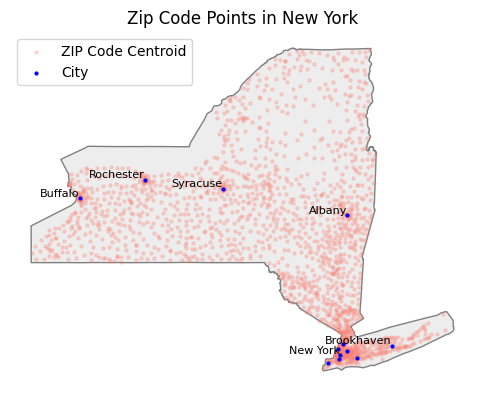

In [26]:
fig, ax1 = plt.subplots(figsize=(6, 6))
ny_df.plot(
    color='#ededed',
    edgecolor='gray',
    ax=ax1
)

# Plot the points on top of the map
zips_points_gdf.plot(ax=ax1, color='salmon', markersize=5, alpha=0.25)
plot_cities(city_points_gdf)

ax1.legend(['ZIP Code Centroid', 'City'])

plt.title('Zip Code Points in New York')
plt.axis('off')
plt.show()

Above is a map of the zip codes in New York visually represented as centroids (so coordinates, instead of shape files) on a map of New York state.  Additionally, the top 12 cities in New York have been plotted.  Due to the density of cities around New York City (labeled as New York), these other cities will not be labeled to avoid overcrowding.

**On the apparent mismatch of state borders between the zip code and the state itself**:  Perhaps due to the difference in sources, the resulting map below does not appear to match up 1-to-1 in the top left edge of the map.  Specifically, the state border of New York depicted above is the political border, which extends beyond the actual land mass of New York itself.  In the northwest area, the border cuts across the Great Lakes, while in the southeast the border circles around Manhattan Island.  Since zip codes do not exist over the water, the soft border formed by zip codes will not correspond to the displayed state border of New York.

Still, assuming that the zip codes have generally been mapped correctly, one can conclude that there is a significantly higher density of zip codes in Manhattan Island/New York City.  Similar to the map for housing locations, there are several clusters in the mid-New York region around Buffalo, Rochester, Syracuse, and Albany as well.

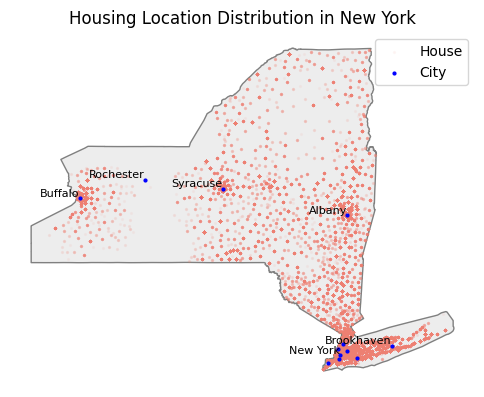

In [25]:
fig, ax1 = plt.subplots(figsize=(6, 6))
ny_df.plot(
    color='#ededed',
    edgecolor='gray',
    ax=ax1
)

# Plot the points on top of the map
data_latlon_gdf.plot(ax=ax1, color='salmon', markersize=2, alpha=0.05)
plot_cities(city_points_gdf)

ax1.legend(['House', 'City'])

plt.title('Housing Location Distribution in New York')
plt.axis('off')
plt.show()

Above is a map of the housing locations in New York plotted by zip codes.

**On using zip code shapefiles**:  Unfortunately, I was not able to fit zip code regions to the state map, and due to time constraints as well as the topic of my research paper, will not be pursuing a solution for this currently.  Yes,  heat map of housing locations with zip code shapefiles would have been ideal for concretely capturing the density of houses.  However, my goal is to calculate distance between a given house and the nearest universities, and to that end a heatmap may not serve a use other than for heatmaps.

The next best thing to a heat map is:  The zip code centroids have been plotted with low opacity, such that zip codes with comparatively more houses will appear darker than zip codes with fewer houses.  In addition to the zip code centroids, the twelve most populated cities of New York have also been plotted.

The majority of houses (as well as cities, for that matter) appear to cluster around New York City/Manhattan Island.  Additionally, there are three other smaller clusters in the mid-New York region, around Buffalo, Syracuse, and Albany.  The tendency for houses to cluster around cities make sense, as cities are the result of urbanization, which tends to beget more houses.

Strangely, Rochester is the only city in New York that does not appear to have any houses clustering around it.  Either realtor.com, the source of the housing data for this paper, did not have houses in Rohester, or the houses in Rochester were filtered out during the data cleaning and outlier removal process in Part I.

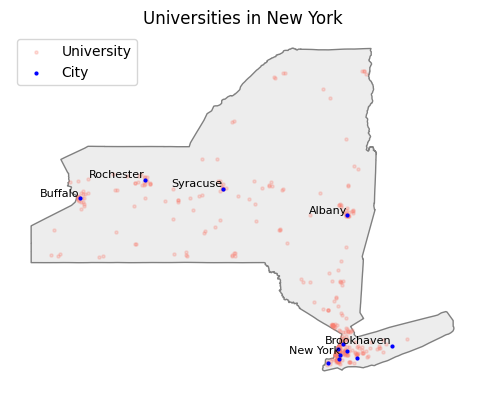

In [27]:
fig, ax1 = plt.subplots(figsize=(6, 6))
ny_df.plot(
    color='#ededed',
    edgecolor='gray',
    ax=ax1
)

# Plot the universities on top of the map
unis_gdf.plot(ax=ax1, color='salmon', markersize=5, alpha=0.25)
plot_cities(city_points_gdf)

ax1.legend(['University', 'City'])

plt.title('Universities in New York')
plt.axis('off')
plt.show()

Above is a map of the locations of universities in New York plotted onto New York state.  There is considerable concentration on and around New York city and Manhattan island.  This trend is unsurprising considering New York City's status as the largest and most influential American metropolis.  Outside of New York city, there are a few more clusters of universities present at other cities in New York Buffalo, Rochester, Syracuse, and Albany.

**Findings**:  the locations and manner of clusters for housing locations, zip codes, and universities are similar.  All three exhibit noticeable clustering around New York City, with a few more clusters in select locations scattered across the state.  While not exact, this observation points toward a positive correlation between the number of houses, the number of zip codes, and the number of universities in an area.

## Plots, Histograms, Figures:  Distance to University

For the distance to university, tables, histograms, and scatter plots would be more suitable.  Below are some figures and interpretations.

In [30]:
include_columns = ["nearest_uni_name", "nearest_uni_distance_in_miles"]
descriptive_data = data_latlon_gdf[include_columns].describe(include='all')
descriptive_data

,nearest_uni_name,nearest_uni_distance_in_miles
count,65504,65438.00
unique,293,NaN
top,Eastern Suffolk BOCES,NaN
freq,2325,NaN
mean,NaN,5.17
std,NaN,7.34
min,NaN,0.01
25%,NaN,0.66
50%,NaN,1.85
75%,NaN,6.49


According to the table above, the university with the most amount of houses close to it is Eastern Suffolk BOCES.  According to its Linkedin page, it is an educational cooperative that appears to cater to a wide array of demographics (2023).  A quick search indicated that the university has a considerable number of campuses, all of which are on Long Island.  This is likely the reason why this university has the most amount of houses near it.

C:\Users\fuzzi\AppData\Local\Temp\ipykernel_17252\376664752.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  n.set_xticklabels(n.get_xticklabels(), rotation=45)


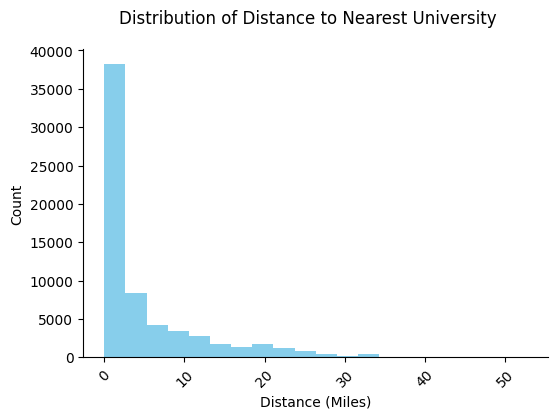

In [31]:
fig, ax1 = plt.subplots(figsize=(6, 4))
# full distribution, at full height
data_latlon_gdf["nearest_uni_distance_in_miles"].plot(
    kind="hist", 
    xlabel="Distance (Miles)", 
    ylabel="Count",
    color="skyblue",
    bins=20, 
    legend=False, 
    density=False, 
    ax=ax1
)
fig.suptitle("Distribution of Distance to Nearest University")
aesthetics(ax1);

The histogram above shows that the overwhelming majority of houses are within 2.5 miles from a university.  Given the tendency of houses and universities to cluster around cities, it is natural that the majority of houses will be close to a university.  The furthest houses are over 50 miles away, and they are almost entirely hidden in the histogram.

---
# Part III
Below is a summary of what Part III will consist of:
1. **Potential Data to Scrape**
2. **Potential Challenges**
3. **On the Chosen Dataset**
4. **Scraping, Cleaning, (and Merging) Data**
5. **Visualizing the Scraped Dataset**
6. **Adding a New Dataset**

## Potential Data to Scrape

In Part II of my project, I found that there does exist a relationship between proximity to a university and housing price.  However, the variation is highly heteroskedastic, with significantly more fluctuation in price in relation to virtually all of the controls (proximity to university, house size, etc.).  This may indicate the presence of a significant unobserved factor that significantly influences house prices outside of university proximity.  There is also potential endogeneity, such that there exists unobserved traits that affect *both* the control(s) in question and house price.

Potential data to scrape include information on all of these unexplained traits:
- **university quality**.  A prestigious university is likely to have more houses built close to it, as well as drive up prices of said houses, as homes near higher-ranked schools could be more desirable.
- **environmental factors**.  Noise pollution, air quality, and the presence of green spaces can significantly impact housing prices. For example, houses in quieter areas or those closer to parks might be more expensive.
- **crime rate**.  Lower crime rates in an area are often associated with higher housing prices, as they directly impact the perceived safety and desirability of the neighborhood.
- **demographic differences**.  Houses in neighborhoods that are dominated by one race may increase or decrease desirability of the house.
- **ease of access to amenities/transportation**.  A house with more accessible transport or amenities tend to be more popular, and amenities and transportations may on average occur more frequently in large cities.

## Potential Challenges

For the above topics listed, there are several potential challenges to scraping data from these topics:
- **data availability and consistency**.  Not all data may be readily available in a website.  For example, information on university quality might be spread across various ranking sites, each with its own criteria and ranking method, leading to inconsistencies.
  - In particular, I may not be able to find data that lists information on all 400+ universities in my current working dataset.
- **granularity mismatches**.  Aligning data from different sources can be difficult if they use different geographical boundaries or identifiers.  For instance, the area considered by a crime report may not exactly match the areas in my dataset.
- **temporal relevance**.  Data may not be up to date, which may affect the accuracy of my analysis.
- **time constraints**.  A website may include a comprehensive list of all the data I desire, but due to HTML structure, it may not be feasible time-wise to scrape said data.
- **pay walls**.  A website may include all the data I desire, but I must pay for it.
- **complexity of web structures**.  Websites may contain complex or dynamic structures that may require extra tailor-made steps in the code to scrape data effectively.
- **rate limiting/IP blocking**.  Websites often have safeguards against automated scraping or botting in order to protect against overloading their servrs.  Scraping too much data at once or too many times may trigger these safeguards.

Because my first priority is finding "institutional factors" that describe the universities in New York, I set out to find websites that list this information.

I found two sites that fit my needs:  USNews.com and collegesimply.com.  USNews contained:  university ranking on a global level, global score, enrollment count, and location.  However, I could not filter for universities in New York only.  Additionally, the data is displayed on one continuous page that loaded as I scrolled.  My attempt to scrape the data with simple HTML methods caused my program to load indefinitely, before crashing.

CollegeSimply contained:  university ranking on a state level, enrollment, tuition, acceptance rate, estimated average GPA, as well as a plethora of other information.  Moreover, I was able to filter for universities in New York only.  While the webpage display is dynamic, meaning that the data is displayed in parts.  Fortunately, the different pages can be accessed by changing the end of the link ("/?page=[number here]").

## On the Chosen Dataset

For reasons listed in the above section, I have decided to scrape data from a website called College Simply, specifically the search page that lists the "Ranked List of Colleges and Universities in New York for 2024."  Despite that this website does not list 400+ universities, it is the most complete website on university data that I could scrape from in a short amount of time with relative ease.

The website lists 256 universities in total, and includes information on the university name, number of students enrolled, rank in New York, tuition price, estimated average GPA (other information is included as well, but only the described information will be scraped).  The data itself is sourced from the US Department of Education National Center for Education Statistics.

The scraping process will involve the following steps:
1. scrape the dataset into a .txt file.  This is so that I do not have to keep scraping off the website over multiple sessions, risking a rate limit or IP ban.
2. process the data into a Pandas dataframe
3. writing the dataframe into a .csv file

## Scraping, Cleaning, (and Merging) Data

### Scraping
I started by coding the HTML data scraping process from CollegeSimply. The website's search function, found at "https://www.collegesimply.com/colleges/new-york/?page=", filters to show only New York universities. By appending a page number to the URL, you can navigate through the search results pages.

This allowed for a simple for loop to scrape all the data I need.  After running the scraping code once, I saved the results into a text file for easy access.

In [ ]:
base_url = "https://www.collegesimply.com/colleges/new-york/?page="
max_pages = 15
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) ApplyWebKit/537.36 (KHTML, like Gecko)'}

data = []

# writing the data I scraped into a .txt file so I don't need to scrape every time.
# I will not run this cell in future sessions
for page in range(max_pages + 1):
    url = base_url + str(page)
    response = requests.get(url, headers=headers)
    
    if response.status_code == 200:
        soup = BeautifulSoup(response.text, 'html.parser')
        
        page_data = soup.find_all("div", "col-sm-6 col-xl-4 mb-5 hover-animate")
        
        data.extend(page_data)
    else:
        print(f"Failed to fetch page {page}. Status code: {response.status_code}")
        break
f = open("collegesimply.txt", "w")
f.write(str(data))
f.close()

In [ ]:
# Open the .txt file
with open('collegesimply.txt', 'r') as file:
    # Read the contents of the file
    data_soup_txt = file.read()

### Cleaning
After procuring my HTML data, I defined some functions to use, as some of the information required similar but incredibly tedious steps to parse through.

In [ ]:
# defining equations to use in the data extraction process
def extract_numbers(s: str) -> float:
    num = ""
    decimal_encountered = False  # Keep track of the decimal point
    for i in s:
        if i.isdigit():
            num += i
        elif  i == '.' and not decimal_encountered:
            num += i
            decimal_encountered = True
    if num:
        return float(num)
    else:
        return None

def extract_university_name(text):
    # Check if 'Private' is in the text
    if 'Private' in text:
        return text.split("Private")[0].strip()
    # Check if 'Public' is in the text
    elif 'Public' in text:
        return text.split("Public")[0].strip()
    # Return the original text if neither 'Private' nor 'Public' is found
    else:
        return text.strip()

In [ ]:
# parsing the HTML soup into a pandas Dataframe as well as .csv file
html_snippet = data_soup_txt
soup = BeautifulSoup(html_snippet, 'html.parser')

universities_data = []

for university in soup.find_all('h3', class_='h6 card-title'):
    # name = university.get_text(separator=" ").split("Private")[0].strip()
    name = extract_university_name(university.get_text(separator=" "))
    ranking_raw = university.find('span', class_='flex-shrink-1 mb-0 px-0 badge badge-pill text-right text-primary').get_text(strip=True)
    ranking = extract_numbers(ranking_raw)
    
    details = university.find('ul', class_='list-inline text-sm mb-3 text-muted').find_all('li')
    enrollment_raw = details[0].get_text(strip=True)
    enrollment = extract_numbers(enrollment_raw)
    net_price_raw = details[1].get_text(strip=True)
    net_price = extract_numbers(net_price_raw)
    acceptance_rate_raw = details[2].get_text(strip=True)
    acceptance_rate = extract_numbers(acceptance_rate_raw) / 100.0
    estimated_avg_gpa_raw = details[5].get_text(strip=True)
    estimated_avg_gpa = extract_numbers(estimated_avg_gpa_raw)

    # Append this university's data to the list
    universities_data.append({
        "Name": name,
        "Ranking": ranking,
        "Enrollment": enrollment,
        "Tuition": net_price,
        "Acceptance Rate": acceptance_rate,
        "Estimated Avg GPA": estimated_avg_gpa,
    })

all_unis_df = pd.DataFrame(universities_data)
all_unis_df.to_csv('collegesimply.csv', index=False)

Then, I wrote a for loop to run the .txt file through.  Finally, I sorted all the relevant information into a dataframe as well as a .csv file.

In future sessions, I could simply call the .csv file directly.

## Visualizing the Scraped Dataset

Below are figures and interpretations of the scraped dataset:

In [2]:
a = pd.read_csv("collegesimply.csv")
a.describe()

,Ranking,Enrollment,Tuition,Acceptance Rate,Estimated Avg GPA
count,91.00000,256.000000,236.000000,256.000000,136.000000
mean,46.00000,4326.960938,18803.135593,0.797266,3.339926
std,26.41338,6714.291108,11435.933678,0.240335,0.381596
min,1.00000,6.000000,204.000000,0.040000,2.100000
25%,23.50000,435.500000,8927.250000,0.677500,3.132500
50%,46.00000,1962.500000,17319.000000,0.860000,3.365000
75%,68.50000,5123.250000,25267.750000,1.000000,3.672500
max,91.00000,59144.000000,61379.000000,1.000000,4.000000


In [3]:
a.describe(include='object')

,Name
count,256
unique,256
top,Cornell University
freq,1


Of all of the 256 universities, only 91 of them are ranked, and only 136 have estimated average GPAs.  It can be reasonably inferred that universities without rankings or estimated average GPAs may not perform as well academically or have the same level of recognition as those that are ranked or have GPA information available.

All 256 universities have enrollment information and acceptance rate, and all but 20 universities have tuition listed.  Four histograms depict the distribution of enrollment, tuition, acceptance rate, and estimated average GPA.  After that, a few scatterplots depict the potential relationship between these four variables.

C:\Users\fuzzi\AppData\Local\Temp\ipykernel_320\376664752.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  n.set_xticklabels(n.get_xticklabels(), rotation=45)
C:\Users\fuzzi\AppData\Local\Temp\ipykernel_320\376664752.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  n.set_xticklabels(n.get_xticklabels(), rotation=45)


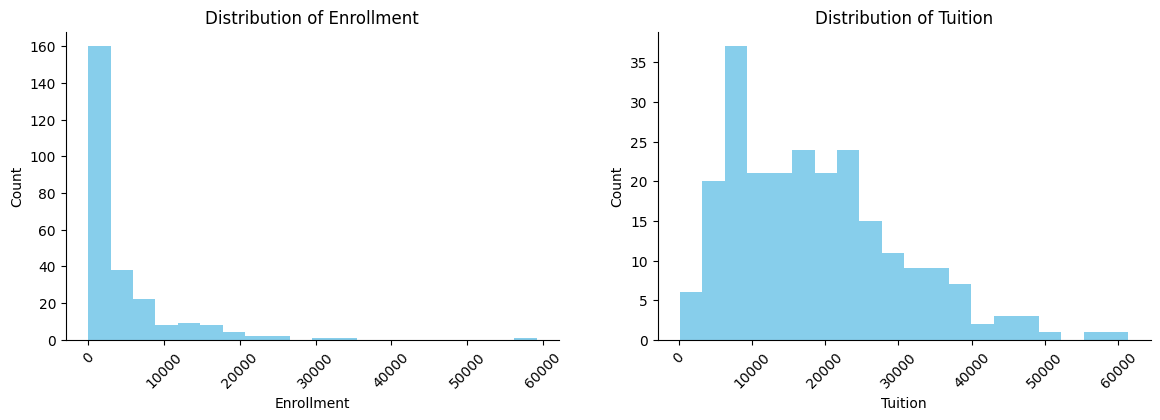

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))
a["Enrollment"].plot(kind="hist", 
    xlabel="Enrollment", 
    ylabel="Count",
    color="skyblue",
    bins=20, 
    legend=False, 
    density=False, 
    ax=ax1
)
a["Tuition"].plot(kind="hist", 
    xlabel="Tuition", 
    ylabel="Count",
    color="skyblue",
    bins=20, 
    legend=False, 
    density=False, 
    ax=ax2
)
ax1.set_title("Distribution of Enrollment")
ax2.set_title("Distribution of Tuition")
aesthetics(ax1)
aesthetics(ax2);

C:\Users\fuzzi\AppData\Local\Temp\ipykernel_320\376664752.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  n.set_xticklabels(n.get_xticklabels(), rotation=45)
C:\Users\fuzzi\AppData\Local\Temp\ipykernel_320\376664752.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  n.set_xticklabels(n.get_xticklabels(), rotation=45)


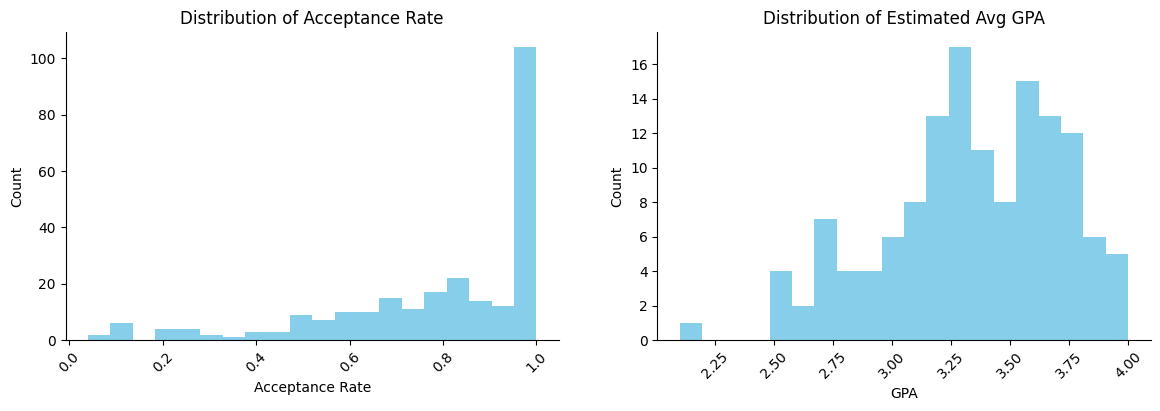

In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))
a["Acceptance Rate"].plot(kind="hist", 
    xlabel="Acceptance Rate", 
    ylabel="Count",
    color="skyblue",
    bins=20, 
    legend=False, 
    density=False, 
    ax=ax1
)
a["Estimated Avg GPA"].plot(kind="hist", 
    xlabel="GPA", 
    ylabel="Count",
    color="skyblue",
    bins=20, 
    legend=False, 
    density=False, 
    ax=ax2
)
ax1.set_title("Distribution of Acceptance Rate")
ax2.set_title("Distribution of Estimated Avg GPA")
aesthetics(ax1)
aesthetics(ax2);

In [8]:
a1 = a.sort_values(by='Enrollment', ascending=False)
a1.head(1)

,Name,Ranking,Enrollment,Tuition,Acceptance Rate,Estimated Avg GPA
5,New York University,6.00,59144.00,29499.00,0.12,3.79


The distribution of enrollment amont universities in New York is highly positively skewed, indicating that a majority of universities tend to have smaller student bodies, a finding that is supported by the median of enrollment being 1962.5 students despite the mean being 4326.96 students.  Additionally, there is one outlier, New York University, with almost 60,000 students enrolled.

By contrast, the distribution of tuition fees is approximately normal, but exhibits a slight positive skew.  In the context of the enrollment distribution, this indicates that while tuition fees across universities tend to vary around a central value, there is a tendency for smaller universities to charge a higher tuition.

Acceptance rate distribution is negatively skewed, with a sudden peak at 100% acceptance.  This unusual spike may either be due to shortcuts in how the data was collected, or the reality that a significant number of universities genuinely accept all applicants.  The latter scenario is reasonably plausible, as less prestigious universities very likely do not have the luxury of having an overflow of applicants.

Estimated GPA distribution is approximately normal, with a slight negative skew.  The reason for this may be that GPA can vary between universities, such that achieving a 3.5 at one university might not require the same level of effort or achievement as it would at a more rigorous university.  Thus, despite differences in reputation or academic difficulty, universities might report similar average GPA.

What is the relevance of observing these university-level characteristics?  The relevance lies in the potential correlation between these characteristics and housing prices, which we will explore in Part 4.  For example, one might expect a university with a higher enrollment to also experience price increases in houses close to it, due to the increased demand from university students.  Or, a more expensive university could also have more expensive housing prices, as the university students attending these universities are more wealthy to begin with.

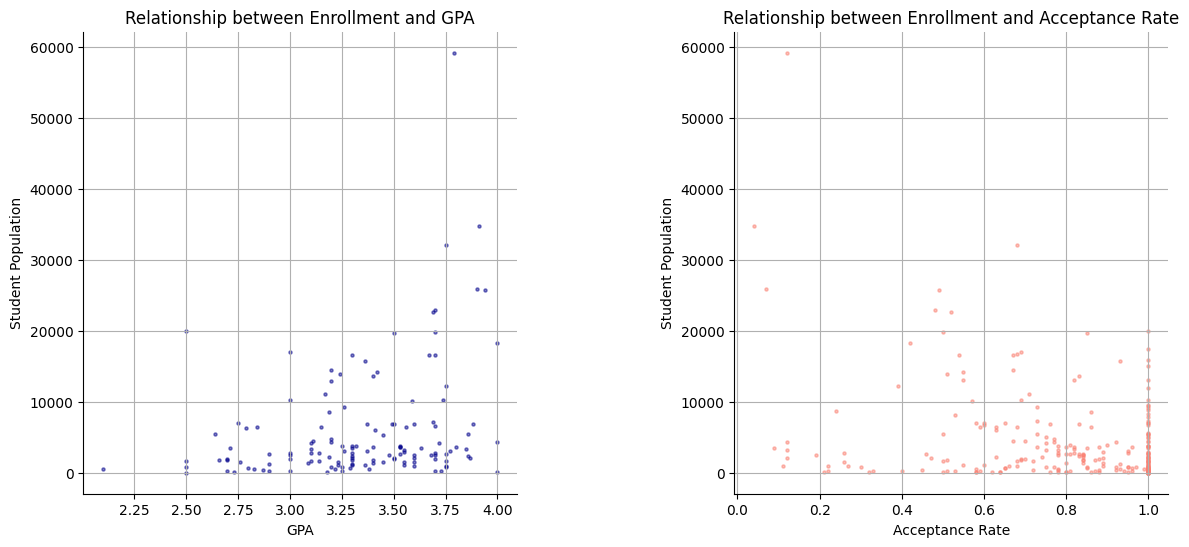

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Scatter plot for enrollment count vs. GPA
ax1.scatter(a['Estimated Avg GPA'], 
    a['Enrollment'], 
    color='darkblue', 
    alpha=0.5, 
    s=5)
ax1.set_title('Relationship between Enrollment and GPA')
ax1.set_xlabel('GPA')
ax1.set_ylabel('Student Population')
ax1.grid(True)

# Scatter plot for enrollment count vs. tuition
ax2.scatter(a['Acceptance Rate'], 
    a['Enrollment'], 
    color='salmon', 
    alpha=0.5, 
    s=5)
ax2.set_title('Relationship between Enrollment and Acceptance Rate')
ax2.set_xlabel('Acceptance Rate')
ax2.set_ylabel('Student Population')
ax2.grid(True)

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.5)

# Adjust layout
aesthetics1(ax1)
aesthetics1(ax2)

plt.show();

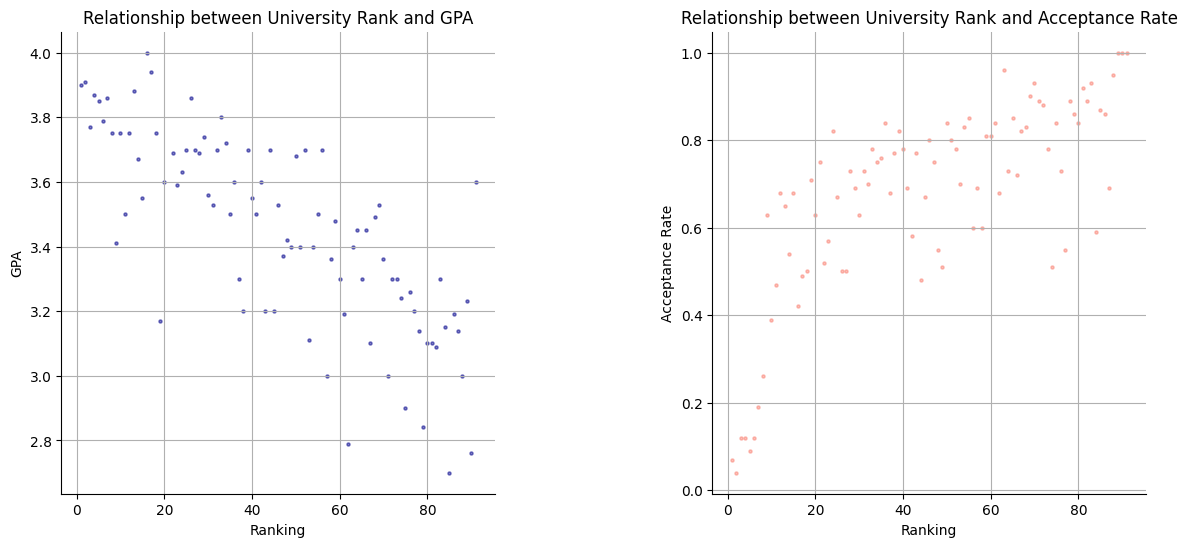

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Scatter plot for enrollment count vs. GPA
ax1.scatter(a['Ranking'], 
    a['Estimated Avg GPA'], 
    color='darkblue', 
    alpha=0.5, 
    s=5)
ax1.set_title('Relationship between University Rank and GPA')
ax1.set_xlabel('Ranking')
ax1.set_ylabel('GPA')
ax1.grid(True)

# Scatter plot for enrollment count vs. tuition
ax2.scatter(a['Ranking'], 
    a['Acceptance Rate'], 
    color='salmon', 
    alpha=0.5, 
    s=5)
ax2.set_title('Relationship between University Rank and Acceptance Rate')
ax2.set_xlabel('Ranking')
ax2.set_ylabel('Acceptance Rate')
ax2.grid(True)

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.5)

# Adjust layout
aesthetics1(ax1)
aesthetics1(ax2)

plt.show();

The scatterplots above show significant correlations between all the variables in question for universities in New York.

The relationship between student population and GPA shows a notable pattern: there is greater variance in student population at universities with higher estimated average GPAs.  This trend could be attributed to the fact that larger universities owe their size to more funding and having a better reputation, factors that also contribute to an environment that encourages academic excellence.

Conversely, there appears to be a weak negative correlation between student population and acceptance rate.  Similar to the relationship between student population and GPA, this correlation suggests that prestigious universities, which are more likely to support a larger student body, tend to be more selective in their admissions process.

The last two scatter plots plot GPA and acceptance rate against university ranking.  In the scatterplot involving GPA, there exists a significant "negative" correlation between ranking and GPA.  (I put negative in quotes because statistically it IS a negative correlation.  However, we tend to think of low numbers on rankings as "high ranking."  Viewed from that perspective, it makes more sense to think of the correlation as positive.)  Generally, the higher the ranking is for a university, the higher the estimated average GPA is.

In the scatterplot involving acceptance rate, there appears to be a logarithmic positive relationship between ranking and acceptance rate.  The acceptance rate rises quickly in relation to the number in university ranking until about rank 20, where it begins to level off.  The lower ranked the university, the less selective.

Admittedly, the data analysis done in this particular section is removed from housing prices.  However, if I am to think about the correlation between university characteristics and housing prices in Part 4, I should also look at how these characteristics relate to each other.  For example, two highly correlated variables should have an interaction term added.  The analysis done here is the set up for Part 4.

## Adding a New Dataset

The additional new dataset will provide potential exogenous variables for the final analysis of how university proximity impacts housing prices.  I say "potential" because just indiscriminantly adding controls to a regression can introduce noise and pollute the results;  therefore realistically not all variables added may be relevant.  Nonetheless, having a broader roster of variables to choose from could enhance the precision of our analysis.

The new dataset I chose contains data on all public primary and secondary public schools across the United States, compiled from Homeland Infrastructure Foundation-Level Data (2019).  This dataset is the most comprehensive dataset I could find for free that is a) relevant to my research project and 2) is also at the zip code level.

Why primary and secondary public school data?  As the topic of my research paper essentially analyzes the impact of post-secondary education on house prices, it makes sense to control for other types of education as well.

### Data Cleaning
In order to merge this dataset (let's call it B) into my working dataset (A), I have to ensure that the components of the zip codes in dataset A match with dataset B's zip codes.

In [3]:
A = pd.read_csv("FRE2.csv")
A['zip_code'] = A['zip_code'].astype(str)
A[['price']].describe()

,price
count,65504.00
mean,932850.40
std,1443574.13
min,0.00
25%,229000.00
50%,519000.00
75%,975000.00
max,15000000.00


Note that my dataset A currently has 65,504 observations.

In [4]:
B = pd.read_csv("public_schools.csv")
B['ZIP'] = B['ZIP'].astype(str)

For the purposes of this paper, we only need data for public schools in New York state.  Next, we will filter out the irrelevant columns of the dataset.

In [5]:
B1 = B[B["STATE"] == "NY"]
B1 = B1.drop(columns=['X', 'Y', 'OBJECTID', 'NCESID', 'ADDRESS', 'ZIP4', 
                      'TELEPHONE', 'TYPE', 'STATUS', 'COUNTYFIPS', 'COUNTRY', 
                      'NAICS_CODE', 'NAICS_DESC', 'SOURCE', 'SOURCEDATE', 
                      'VAL_METHOD', 'VAL_DATE', 'WEBSITE', 'LEVEL_', 'ST_GRADE', 
                      'END_GRADE', 'DISTRICTID', 'FT_TEACHER', 'SHELTER_ID'])

Now using groupby(), I counted the number of public schools in each zip code in dataset B, and matched that data onto dataset A such that all 65,504 house observations in dataset A have a number of public schools in its corresponding zip code.

In [6]:
schools_per_zip = B1.groupby('ZIP').size().reset_index(name='# of public schools')

# 'left' merge ensures all houses in A are kept, even if no matching zip code is 
# found in B (resulting in NaNs for such cases)
A1 = pd.merge(A, schools_per_zip, left_on='zip_code', right_on='ZIP', how='left')

# To fill NaN values with 0 (indicating 0 public schools for houses with no match
# in B)
A1['# of public schools'].fillna(0, inplace=True)

### Plots, Histograms, Figures:  Public School Data
Below are several figures visualizing the characteristics of the public schools data, as well as its relationship with the housing data.  Below, I will create a new variable called public schools per square mile `schools_density` using the `population` and `density` variables, on the assumption that `density` is $\text{population}/\text{square mile}$.
$$\text{schools\_density} = \text{schools}\cdot\overbrace{\text{population}\over\text{square mile}}^{\text{density}}/\text{population}$$

In [6]:
A1 = pd.read_csv("FRE4.csv")

In [4]:
A1['schools_density'] = A1['# of public schools'] * A1['density'] / A1['population']

In [7]:
A1[['# of public schools', 'schools_density']].describe()

,# of public schools,schools_density
count,65504.00,65411.00
mean,7.10,1.73
std,6.64,2.87
min,0.00,0.00
25%,2.00,0.03
50%,5.00,0.37
75%,9.00,2.25
max,46.00,19.50


Firstly, the count of observations, 65,504, indicates that no data from my housing data was dropped.

The average number of public schools per zip code in New York appears to be 7.1, but the standard deviation is almost as large as the mean at 6.64.  Additionally, the median number of schools is 5, while the maximum is 46.

The density reveals lower numbers.  The average number of schools per square mile in a given ZIP code is 1.73, while the median is less than one, indicating that over 50% of ZIP codes have less than one public school per square mile.

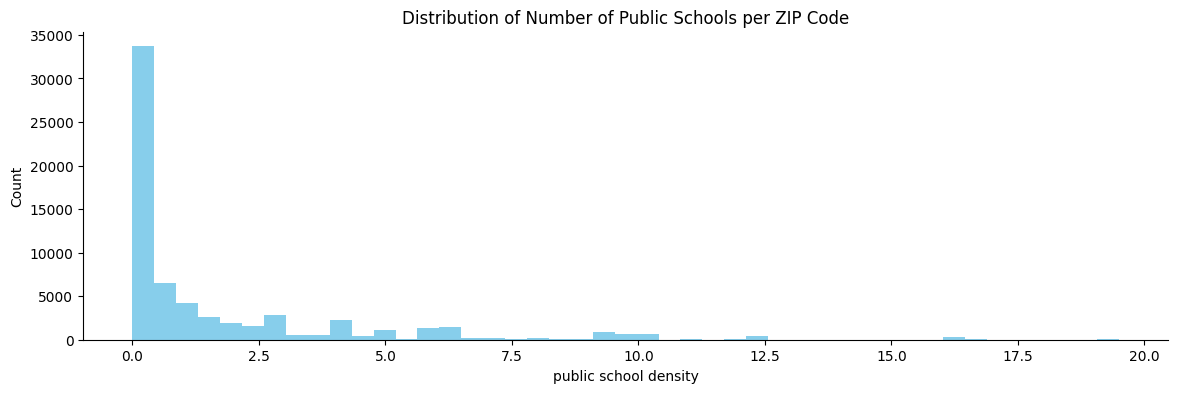

In [16]:
fig, ax1 = plt.subplots(figsize=(14, 4))
# full distribution, at full height
A1["schools_density"].plot(
    kind="hist", 
    xlabel="public school density", 
    ylabel="Count",
    color="skyblue",
    bins=45, 
    legend=False, 
    density=False, 
    ax=ax1
)
ax1.set_title("Distribution of Number of Public Schools per ZIP Code")
aesthetics1(ax1);

The distribution of public schools per zip code in New York is heavily positively skewed, with the vast majority of zip codes having less than one public school per square mile.  A select few ZIP codes have an extremely high concentration of public schools.  It is likely that these zip codes are also the most urbanized areas in New York.  The table below ranks the areas by density of public schools.

In [12]:
# Create a new DataFrame with unique zip codes, including city and # of public schools
A1_zips_unique = A1[['city', 'zip_code', 'schools_density']].drop_duplicates('zip_code')

A1_zips_unique_sort = A1_zips_unique.sort_values(by='schools_density', 
                                                 ascending=False)

# Display the sorted DataFrame
A1_zips_unique_sort.head(10)

,city,zip_code,schools_density
2918,New York City,10030,19.50
3622,New York City,10282,16.87
2626,Bronx,10456,16.50
2601,New York,10002,16.43
2756,Bronx,10457,12.30
2566,New York City,10003,12.16
3056,New York,10026,12.09
2935,New York City,10029,11.05
8695,Bronx,10455,10.46
3326,Bronx,10453,10.28


Bronx, Brooklyn, and New York City are all integral parts of the highly urbanized and densely populated New York metropolitan area. It is no coincidence that these locations also have the highest concentration of public schools.   

c:\Users\fuzzi\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


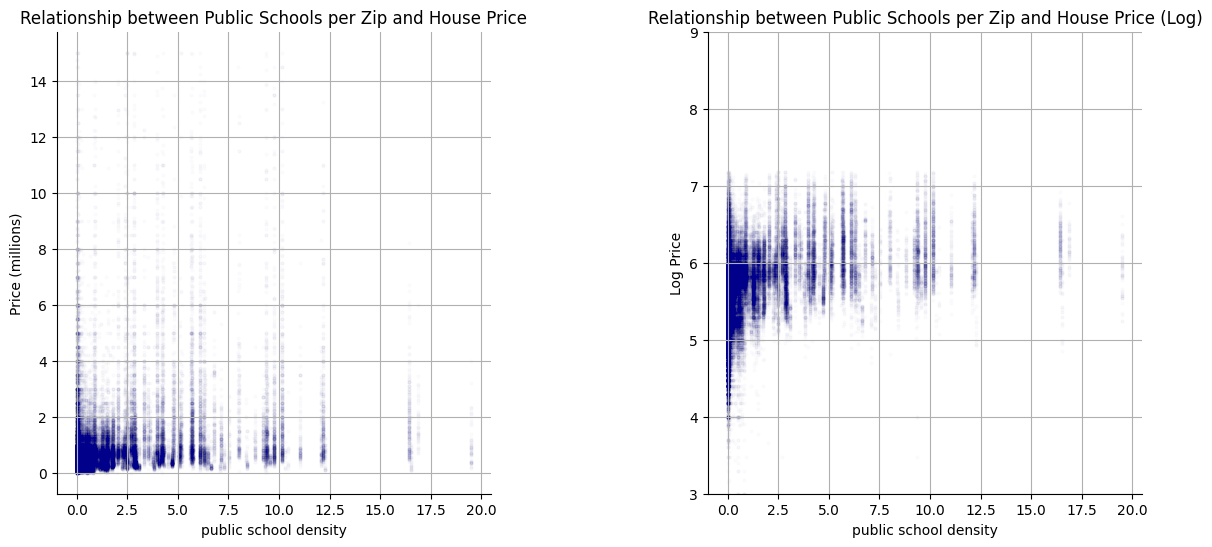

In [17]:
A1['price (1m)'] = A1['price'] / 1000000

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
ax1.scatter(A1['schools_density'], 
    A1['price (1m)'], 
    color='darkblue', 
    alpha=0.01, 
    s=5)
ax1.set_title('Relationship between Public Schools per Zip and House Price')
ax1.set_xlabel('public school density')
ax1.set_ylabel('Price (millions)')
ax1.grid(True)

x = np.log10(A1['schools_density'] + 1)
y = np.log10(A1['price'])

ax2.scatter(A1['schools_density'],  
    y, 
    color='darkblue', 
    alpha=0.01, 
    s=5)
ax2.set_title('Relationship between Public Schools per Zip and House Price (Log)')
ax2.set_xlabel('public school density')
ax2.set_ylabel('Log Price')
ax2.grid(True)

# Disable scientific notation for the y-axis (price)
ax1.ticklabel_format(style='plain', axis='y')
ax2.ticklabel_format(style='plain', axis='y')

ax2.set_ylim(3, 9)# set axis limits

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.5)

# Adjust layout
aesthetics1(ax1)
aesthetics1(ax2)

plt.show();

The scatterplots above show a much higher variation in houses in areas with less public schools than houses in areas with  more public schools.  In particular, houses in areas with less public schools seem more likely to be more expensive.  This could indicate that the presence of more public schools may place a ceiling on house price.  However, after logging for price, there only exists a weak positive correlation between public schools per zip code and price.  Perhaps the presence of more public schools does make a house more desirable (therefore pricier) but there may also exist external policies that prevent houses close to many schools from becoming too high.

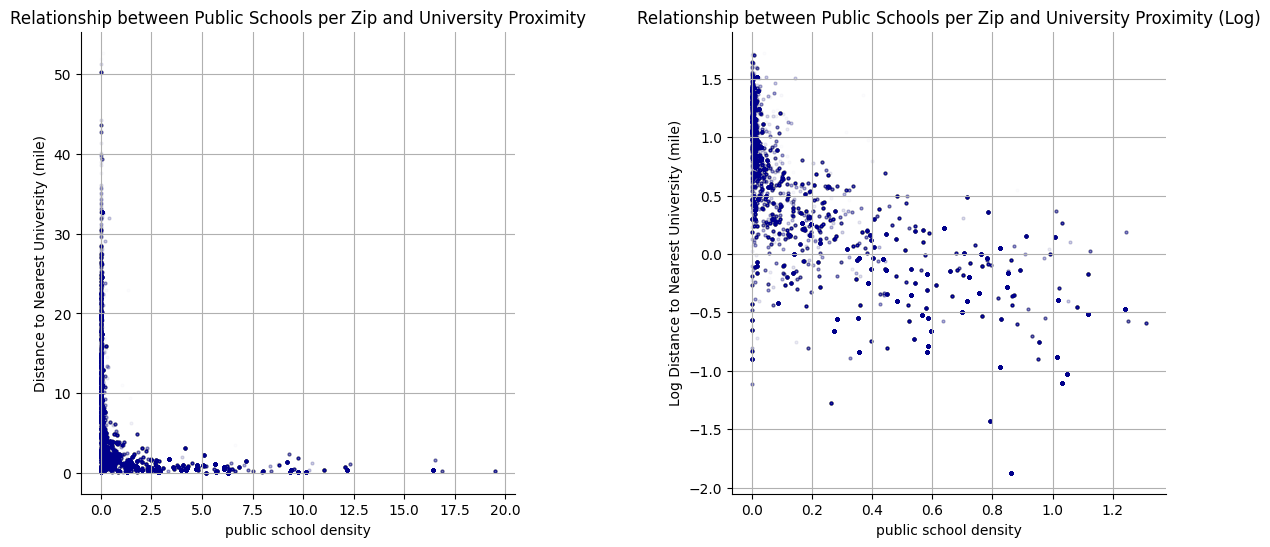

In [18]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
ax1.scatter(A1['schools_density'], 
    A1['nearest_uni_distance_in_miles'], 
    color='darkblue', 
    alpha=0.01, 
    s=5)
ax1.set_title('Relationship between Public Schools per Zip and University Proximity')
ax1.set_xlabel('public school density')
ax1.set_ylabel('Distance to Nearest University (mile)')
ax1.grid(True)

x = np.log10(A1['schools_density'] + 1)
y = np.log10(A1['nearest_uni_distance_in_miles'])

ax2.scatter(x,  
    y, 
    color='darkblue', 
    alpha=0.01, 
    s=5)
ax2.set_title('Relationship between Public Schools per Zip and University Proximity (Log)')
ax2.set_xlabel('public school density')
ax2.set_ylabel('Log Distance to Nearest University (mile)')
ax2.grid(True)

# Disable scientific notation for the y-axis (price)
ax1.ticklabel_format(style='plain', axis='y')
ax2.ticklabel_format(style='plain', axis='y')

# ax2.set_ylim(3, 9)# set axis limits

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.5)

# Adjust layout
aesthetics1(ax1)
aesthetics1(ax2)

plt.show();

The above scatterplot reveals that houses in districts with less public schools are generally farther from a university as well.  However, there also exists a much higher variation in houses in districts with less public schools.  Logging both distance to nearest university and public school density show a noticeable negative correlation between distance to nearest university and the density of public schools.

---
# Part IV
Below is a summary of what Part IV will consist of:
1. **OLS Regression**
    1. Simple Variable Analysis + Discussion
    2. Data Merging (An Attempt)
    3. Regressions
    4. Tables + Analysis
2. **Machine Learning**

## OLS Regression

### Recap and Discussion

To recap, the dependent variable is housing price, and the independent variable as denoted by my research question is proximity to nearest university.  I have also included a number of other potential X variables, such as the number of bedrooms and bathrooms, the number of schools in a given house's ZIP code, and estimated GPA of the nearest university to a house.

Analysis in previous parts leads me to believe that the economic relationship between my Y and X variable is **linear, provided that both the Y and X variables are logged**.  Essentially, the relationship is elasticity, where a percent increase in X leads to a percent increase/decrease in Y.  This applies to the relationship between house price and university proximity, as well as some other covariates.  In this part, I will log some covariates like house size to find that the variable can explain data more adequately.

Here are the scatterplots mapping housing price and university proximity, for reference.

<img src="part II msg.png" alt="Image Title" width="750">

However, the scatterplots also show evidence of a heavier concentration of houses that are closer to a university, as well as arguably more variation in prices for houses further away from a university.  This observation, as well as the simple fact that housing prices can be affected by other factors (and some of those factors can even affect both the Y and X variables), warrants a multivariate or more complex regression.

I will perform regressions utilizing combinations of covariates to find the model of best fit.

Note that all covariates have missing values.  Due to the non-uniform and non-linear nature of the relationship between my Y and X variables, a simple linear estimate of the missing values will be grossly inaccurate.

As the majority of relationships in my data is logarithmic, I will attempt to predict missing values using logged linear estimation.  Since not all relationships are logarithmic, this method is overly broad and makes the data prone to overfitting.  However, due to hardware limitations, I was unable to implement SAEM or KNN methods for a more accurate imputation of missing values.

### Data Merging

For Part IV, I tried to merge data from the webscraped dataset into my working dataset.  However, I ran into a major issue:  125 names out of the 256 universities in the webscraped dataset does not match the university names in my working dataset.  Because there is no way to automatically check and rename potentially mismatched names in the two datasets, it follows that I have to manually check all 125 mismatched universities.

I will still merge the datasets such that each house's nearest university will contain that university's information provided that it matches, just that the regressions involving these variables will unfortunately be limited.

Note:  Oddly enough, there exists NaNs in the university proximity variable.  Perhaps this is due to a house being equidistant to two or more universities, resulting in no university being recorded, or some errors in the distance calculation.

In [8]:
# A1.to_csv("FRE4.csv", index=False)
FRE4 = pd.read_csv("FRE4.csv")
C = pd.read_csv('collegesimply.csv')

num_observations = FRE4.shape[0]
print("Number of observations in FRE4:", num_observations)

Number of observations in FRE4: 65504


In [9]:
FRE4.dropna(subset=['nearest_uni_distance_in_miles'], inplace=True)
num_observations = FRE4.shape[0]
print("Number of observations in FRE4:", num_observations)

Number of observations in FRE4: 65438


In [10]:
# Convert 'nearest_uni_name' column in FRE4 to lowercase
FRE4['nearest_uni_name'] = FRE4['nearest_uni_name'].apply(lambda x: x.lower())
# Convert 'Name' column in DataFrame C to lowercase
C['Name'] = C['Name'].apply(lambda x: x.lower())
FRE4_1 = pd.merge(FRE4, C, how='left', left_on='nearest_uni_name', right_on='Name')
FRE4_1.drop(columns=['Name'], inplace=True)
num_observations = FRE4_1.shape[0]
print("Number of observations in FRE4:", num_observations)

Number of observations in FRE4: 65438


In [11]:
FRE4_1.to_csv("FRE4_1.csv", index=False)

### Dummy Variable Creation + Variable Prediction

A dummy variable `bigcity` is created to denote whether a house in question is in the top 12 most populated cities in New York as of January 30, 2024:  New York, Brooklyn, Queens, Manhattan, Bronx, Buffalo, Hempstead, Rochester, Albany, Staten Island, Brookhaven, and Syracuse.

These 12 cities were chosen because houses in the dataset were shown clustering around these locations.

In [6]:
FRE4_1 = pd.read_csv("FRE4_1.csv")
city_points_df = pd.read_csv("simplemaps.csv")
bigcities_list = city_points_df['city'].tolist()
FRE4_1['bigcity'] = 0
# Set 'is_big_city' to 1 if the city is in the list of big cities
FRE4_1.loc[FRE4_1['city'].isin(bigcities_list), 'bigcity'] = 1

FRE4_1['const'] = 1
FRE4_1.rename(columns={'nearest_uni_distance_in_miles': 'unidist'}, inplace=True)

In [7]:
# del FRE4_2
FRE4_2 = FRE4_1

In [8]:
def predict_covs(dataset, Y: str, X: list):
    # Step 1: Run regression to predict 'Y'
    xvar = dataset[X]
    yvar = dataset[Y]
    predict_reg = sm.OLS(yvar, xvar, missing = 'drop')
    predict_results = predict_reg.fit()
    # Step 2: Obtain predicted values for 'bed'
    predicted = predict_results.predict(xvar)
    # Step 3: Fill in missing values for 'bed' with predicted values
    dataset[Y].fillna(predicted, inplace=True)

In [9]:
FRE4_2['unidist_log'] = np.log10(FRE4_2['unidist'] + 1)  # Adding 1 to avoid log(0)
FRE4_2['price_log'] = np.log10(FRE4_2['price'] + 1)
FRE4_2['acre_lot_log'] = np.log10(FRE4_2['acre_lot'] + 1)
FRE4_2['house_size_log'] = np.log10(FRE4_2['house_size'] + 1)
FRE4_2['population_log'] = np.log10(FRE4_2['population'] + 1)
FRE4_2['density_log'] = np.log10(FRE4_2['density'] + 1)
FRE4_2['schools_density_log'] = np.log10(FRE4_2['schools_density'] + 1)

Several other dummy variables have been created to assess the impact of university prestige on house prices: `top5uni_national`, and `top5uni_liberal`.  The top 5 universities for both dummies were determined by the USNews.com (2024).

`top5uni_national` denotes whether the closest university to a house is one of the top five national universities in New York:  Columbia University, Cornell University, New York University, University of Rochester, and Stony Brook University.  `top5uni_liberal` denotes whether tue closest university to a house is one of the top five national liberal arts colleges in New York:  the United States Military Academy at West Point, Barnard College, Hamilton College, Vassar College, and Colgate University.

In [13]:
top5 = ["columbia university", "cornell university", "new york university", 
        "rochester university", "stony brook university"]

FRE4_2['top5uni_national'] = 0
FRE4_2.loc[FRE4_2['nearest_uni_name'].isin(top5), 'top5uni_national'] = 1

FRE4_1.loc[FRE4_1['city'].isin(bigcities_list), 'bigcity'] = 1

In [14]:
top5 = ["united states military academy", "barnard college", "hamilton college", 
        "vassar college", "colgate university"]

FRE4_2['top5uni_liberal'] = 0
FRE4_2.loc[FRE4_2['nearest_uni_name'].isin(top5), 'top5uni_liberal'] = 1

⠀⠀⠀⠀⠀⠀⠀⠀⠀⡜⠇⠀⠀⠀⠰⡀⠈⣷⡀⠀⠀⠀⠀⠀⠱⠀⠀⠀⠀⠀⢷⡀⠀⠘⡄⠆⠀⠀⠈⣾⡆⠀⢣⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⢸⡄⡄⢧⠀⠀⠀⠈⠒⢄⡈⠳⡄⠀⠀⠀⠀⡀⠀⠀⠀⠀⡀⠁⠀⢀⢇⡷⠀⠀⠀⣿⡇⠀⠘⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⣾⣧⠰⠘⢧⡀⣠⠔⠊⠉⠉⠉⠻⣄⠁⣠⠊⣠⣴⠶⠾⣖⠺⢦⠀⢡⡾⠗⠒⠢⢼⣽⠀⣸⠀⡄⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⡏⢹⣧⠀⠀⡝⠁⣀⣄⣀⣀⠀⠀⠈⢳⠃⠞⠈⢀⣤⣤⣄⠙⠆⢳⣿⡿⠃⠀⣀⣀⣙⢳⡟⣸⡏⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⢱⠀⢿⣷⡔⡀⠈⢹⣿⣿⣿⣷⣀⣀⣾⡄⠀⢰⣿⣿⣿⣿⣷⢀⠀⣿⠁⢠⣾⣿⡇⣻⠆⣧⣿⠁⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⣀⡇⠘⣎⠙⠳⡰⠸⣟⡋⣩⢟⡼⣿⣾⣷⣄⢻⣿⣿⣭⡾⠏⠈⣸⠈⠂⠈⣿⣋⣀⡠⣰⣿⣯⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⢧⠙⣦⡈⠳⣦⣜⣢⣤⣭⣤⣾⣾⣿⣿⣷⣝⡦⠤⣌⡁⢀⣤⣰⣿⣶⣾⠿⠆⣉⣉⡴⠋⣿⠃⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠈⣧⢀⡘⠢⠀⢈⢹⣿⠿⠿⣿⠿⠟⠛⠛⡿⣿⣿⣿⣿⣿⣿⡟⠛⠿⢿⣷⠶⣿⡅⢀⣴⡿⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⢸⠗⢦⣽⣶⣼⣾⠗⠒⠒⢬⣓⠲⣄⢠⣿⡄⠈⠉⠉⢩⣿⡄⣀⠴⣋⠴⠒⣽⣷⠟⣡⣧⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⢠⠃⢀⠀⢳⣼⠈⠻⣿⣿⣿⣶⣿⣿⣿⣿⣿⡿⠦⣤⡴⣺⣿⣿⣿⣿⣷⣶⣾⣿⢻⣟⡀⢸⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⢘⠀⣿⣷⡈⠿⠀⠀⠽⣅⣸⣿⣿⡿⣈⣟⣻⡷⠀⠀⠀⣿⣿⡉⣿⣿⣿⠋⣭⠁⢸⣿⡇⢸⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠸⡄⠘⢿⣧⡀⠀⠐⠀⠈⠙⠛⠛⠛⣩⣶⠏⠀⣤⣶⣦⣿⣿⣿⣟⣿⠛⠛⢻⠀⣿⣿⢃⠇⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠘⢄⠀⠙⢻⡆⡄⠀⠀⠀⠀⠀⠸⣿⡁⠀⠰⠛⠉⠉⢻⠙⣿⣿⠇⠀ ⠀⠀⣾⡿⢁⠎⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠑⣤⣁⣱⢠⠀⠀⠀⠀⠀⠀⠈⠁⠀⠀⠀⠀⠀⠸⣀⠟⠁⠀⠀⠀   ⠸⣟⣱⠊⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⡰⢻⢿⣿⡌⣆⠀⠀⠀⠀⠀⠀⠀⠀⠠⣤⡀⢠⡴⠃⠀⠀⠀  ⠀⠀⣼⠏⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⡇⣾⣾⣿⣧⠸⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠿⢋⡀⠀⠀⠀⠀  ⠀⢠⡿⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢱⣟⢹⣿⣿⣆⠀⠀⠀⠀⠀⠀⣠⣶⣿⠯⣿⠿⣿⣄⠀⠀⠀⠀⢰⣧⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⣠⣿⣾⡛⢧⣿⣷⣄⠀⠀⠀⠀⢩⡁⠀⠀⠀⠀⢀⠄⠀⠀⠀⣴⣿⣿⣿⠃⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢰⣿⢱⡽⠻⣄⠙⢿⣿⣷⣄⠀⠀⠀⢻⡟⣿⣿⣿⠃⠀⠀⣠⣾⡿⣿⢛⣟⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠸⣿⢸⡇⠘⠻⣷⢤⣿⢿⣿⣷⣄⡀⠀⠉⠙⠉⠁⠀⣠⣾⢏⣽⠟⣡⣞⡏⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⣠⠤⢷⣾⠁⡿⡄⠈⣳⣌⡳⣌⠻⢿⣿⣶⣤⣄⣤⣴⣿⠟⡵⠋⣡⡾⠟⢁⣷⠤⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⣀⣠⣴⠟⢁⣀⣾⣿⠀⣧⠈⠲⣧⡀⠉⠺⣿⣄⠙⢿⢿⣿⣿⣿⣯⠞⣡⡾⠋⣠⡷⣿⣿⣄⣈⣦⣄⡀⠀⠀⠀⠀⠀⠀⠀
⠀⢀⡤⠖⠋⠁⣼⡿⠚⠉⢹⣿⣿⣦⣏⠓⠤⢏⠈⠓⠀⠈⢻⡄⠸⡆⢻⣿⣿⠏⢰⡏⠀⠚⢁⡷⡏⢹⣿⡀⠙⢿⣌⠑⠲⢤⣀⠀⠀⠀
⠚⠁⠀⢀⠤⣾⣿⠀⠀⠀⢸⣿⣿⣿⣎⢳⣄⡜⠳⢄⣀⡀⠈⣧⠀⣇⢸⣿⣿⢲⣿⣠⢶⡴⣾⡴⠁⣾⣿⡇⠀⠘⡏⠙⠢⣄⡈⠙⠢⠄
⠴⠒⠉⢀⣾⣿⣯⡀⠀⠀⠈⣿⡟⣿⣿⣷⣍⢣⡀⡏⠀⠹⠀⣿⡂⢻⣾⠏⡇⢸⣿⠃⢠⣷⠋⣠⣾⣿⣿⡇⠀⠈⣷⠀⠀⠀⠈⠑⠒⠤

Additionally, key covariates with missing values (mainly acre size, house size, bedroom and bathroom count), will be predicted using a fitted regression line derived from the final price of the house.

In [15]:
# predicting variables
predict_covs(FRE4_2, "bed", ['price_log', 'const'])
predict_covs(FRE4_2, "bath", ['price_log', 'const'])
predict_covs(FRE4_2, "acre_lot_log", ['price_log', 'const'])
predict_covs(FRE4_2, "house_size_log", ['price_log', 'const'])
predict_covs(FRE4_2, "schools_density_log", ['price_log', 'const'])

In [16]:
# creating interaction terms here
FRE4_2['bed*bath'] = FRE4_2['bed'] * FRE4_2['bath']
FRE4_2['bigcity*density_log'] = FRE4_2['bigcity'] * FRE4_2['density_log']
FRE4_2['density_log*schools_density_log'] = FRE4_2['density_log'] * FRE4_2['schools_density_log']

In [17]:
FRE4_2.to_csv("FRE4_2.csv", index=False)

### Regressions

#### Regression 1:  House Price on University Proximity

Regression 1 regresses house price (`price`) and university proximity (`unidist`);  the second regression regresses the log of house price and the log of university proximity.
\begin{align}
{\hat{\text{log(price)}}} = \hat{\beta_0} + \hat{\beta_1}{\text{log(unidist)}}
\end{align}

In [8]:
# directory
# FRE4 = dataframe as a result of Parts I, II, III
# FRE4_1 = df after merging webscraped uni data
# FRE4_2 = copy of FRE4_1 for regressions and ML
   # (aka with predicted variables)
# FRE4_3 = copy of FRE4_2 but with only observations that have uni ranking

In [3]:
FRE4_2 = pd.read_csv("FRE4_2.csv")

In [4]:
reg1 = sm.OLS(endog=FRE4_2['price_log'], 
              exog=FRE4_2[['const', 'unidist_log']])
results1 = reg1.fit()

In [5]:
stargazer = Stargazer([results1])
stargazer.covariate_order(['unidist_log', 'const'])
HTML(stargazer.render_html())

Because the scatterplot for house price and university proximity shows a strong inverse logarithmic relationship, both variables have been logged.  Thus, the interpretation is that houses that are 1% further away from the closest university will experience a 0.54% decrease in its price.

Both the intercept and the university proximity coefficient are significant at the 1% level, for both the first and second regressions, suggesting a strong relationship between the two.  The standard error in the logged regression is *dramatically* lower than the standard error in the unlogged regression, and the F statistic is also much bigger in the logged regression compared to the unlogged regression, further supporting the hypothesis that the logged model is a much better fit.

Still, an $R^2$ of 0.186 is quite low.  Attempting to add more covariates is certainly reasonable.

#### Regression 2, 3, 4:  Considering Housing Characteristics as Covariates

Regression 2 will add the following covariates:  the number of bedrooms (`bed`), the number of bathrooms (`bath`), and an interaction term between the two.  The interaction term was added because the number of bedrooms and bathrooms in a house are likely to be correlated.
\begin{align}
\hat{\text{log(price)}} = \hat{\beta_0} + \hat{\beta_1}\text{unidist} + \hat{\beta_2}\text{bed} + \hat{\beta_3}\text{bath} + \hat{\beta_4}\text{bed}\cdot\text{bath}\tag{2}
\end{align}

Regression 3 will add the following covariates:  logged acre size (`acre_lot_log`) and log house size (`house_size_log`).  Both variables are logged as they display a more linear relationship with the log of house price when logged.
\begin{align}
\hat{\text{log(price)}} = \hat{\beta_0} + \hat{\beta_1}\text{unidist} + \hat{\beta_2}\text{log(acre\_lot)} + \hat{\beta_3}\text{log(house\_size)}\tag{3}
\end{align}

Regression 4 will add all covariates from Regressions 2 and 3.
\begin{align}
\hat{\text{log(price)}} &= \hat{\beta_0} + \hat{\beta_1}\text{unidist} + \hat{\beta_2}\text{bed} + \hat{\beta_3}\text{bath} + \hat{\beta_4}\text{bed}\cdot\text{bath} \nonumber \\
&\quad + \hat{\beta_5}\text{log(acre\_lot)} + \hat{\beta_6}\text{log(house\_size)} \tag{4}
\end{align}

In [30]:
# Assuming df is your DataFrame 
observations_with_nan = FRE4_2[FRE4_2[['unidist_log', 'bed', 'bath', 'bed*bath']].isnull().any(axis=1)]

# Printing the observations with NaN values
observations_with_nan

,status,bed,bath,acre_lot,city,zip_code,house_size,prev_sold_date,price,house_lat,...,unidist_log,price_log,acre_lot_log,house_size_log,population_log,density_log,schools_log,bed*bath,bigcity*density_log,density_log*schools_log


In [31]:
# Now run regression models
reg2 = sm.OLS(endog=FRE4_2['price_log'], 
              exog=FRE4_2[['const', 'unidist_log', 'bed', 'bath', 'bed*bath']])
results2 = reg2.fit()

reg3 = sm.OLS(endog=FRE4_2['price_log'], 
              exog=FRE4_2[['const', 'unidist_log', 'acre_lot_log', 'house_size_log']])
results3 = reg3.fit()

reg4 = sm.OLS(endog=FRE4_2['price_log'], 
              exog=FRE4_2[['const', 'unidist_log', 'bed', 'bath', 'bed*bath', 
                           'acre_lot_log', 'house_size_log']])
results4 = reg4.fit()

In [32]:
stargazer = Stargazer([results2, results3, results4])
stargazer.covariate_order(['unidist_log', 'bed', 'bath', 'bed*bath', 'acre_lot_log', 
                           'house_size_log', 'const'])
HTML(stargazer.render_html())

#### Regression 5 & 6:  Considering ZIP Code Level Traits as Covariates

Regression 5 will add the following covariates:  the dummy variable denoting whether the house is in a big city (`bigcity`), population per ZIP code (`population_log`), population density per ZIP code (`density_log`), and the density of public schools in the given ZIP code (`schools_density_log`).
\begin{align}
\hat{\text{log(price)}} &= \hat{\beta_0} + \hat{\beta_1}\text{unidist} + \hat{\beta_2}\text{bigcity} + \hat{\beta_3}\text{log(population)} \nonumber \\
&\quad + \hat{\beta_4}\text{log(density)} + \hat{\beta_5}\text{log(schools\_density)} \tag{5}
\end{align}

Regression 6 will add the same covariates as Regression 5, except with interaction variables for `bigcity` and `density_log`, and `schools_density_log` and `density_log`.  This is because big cities should be positively correlated with population density, and a more densely populated area is also more likely to have a higher density of public schools to accomodate.
\begin{align}
\hat{\text{log(price)}} &= \hat{\beta_0} + \hat{\beta_1}\text{unidist} + \hat{\beta_2}\text{bigcity} + \hat{\beta_3}\text{log(population)} + \hat{\beta_4}\text{log(density)} \nonumber \\
&\quad  + \hat{\beta_5}\text{log(schools\_density)} + \hat{\beta_6}{\text{bigcity}\cdot\text{log(density)}} \nonumber \\
&\quad  + \hat{\beta_7}{\text{log(density)}\cdot\text{log(schools\_density)}} \tag{6}
\end{align}

In [17]:
# Assuming df is your DataFrame 
observations_with_nan = FRE4_2[FRE4_2[['unidist', 'bigcity', 'population_log', 
                           'density_log', 'schools_density_log']].isnull().any(axis=1)]

# Printing the observations with NaN values
observations_with_nan

,status,bed,bath,acre_lot,city,zip_code,house_size,prev_sold_date,price,house_lat,...,unidist_log,price_log,acre_lot_log,house_size_log,population_log,density_log,schools_density_log,bed*bath,bigcity*density_log,density_log*schools_density_log


In [18]:
reg5 = sm.OLS(endog=FRE4_2['price_log'], 
              exog=FRE4_2[['const', 'unidist', 'bigcity', 'population_log', 
                           'density_log', 'schools_density_log']])
results5 = reg5.fit()

reg6 = sm.OLS(endog=FRE4_2['price_log'], 
              exog=FRE4_2[['const', 'unidist', 'bigcity', 'population_log', 
                           'density_log', 'schools_density_log', 
                           'bigcity*density_log', 
                           'density_log*schools_density_log']])
results6 = reg6.fit()

In [19]:
stargazer = Stargazer([results5, results6])
stargazer.covariate_order(['unidist', 'bigcity', 'population_log', 'density_log', 
                           'schools_density_log', 'bigcity*density_log', 
                           'density_log*schools_density_log', 'const'])
HTML(stargazer.render_html())

Prior to adding interaction terms, public school counts did not have a significant impact on house price at a 5% level.  After adding interaction terms, public school counts was calculated to have a much higher significant effect at the 1% level.  This change after adding interaction terms may imply that the effect of public school count on price is tied closely with the values of other variables, specifically ZIP code population density.

A more complete analysis will be done with all the covariates included.

#### Regression 7, 8, 9:  Analyzing University Data

As I mentioned in the __Data Merging__ section, half of the university data could not be matched to my housing dataset.  As such, accuracy is likely going to be lowered, due to missing information.  For example, a university that should appear but doesn't due to naming differences will not be included in the analysis.

Regardless, analyses of university level data in relation to my housing dataset still has the potential to yield results.  Interpretations will be done, albeit with the above caveat in mind.

The tricky part about this section is that the variables in university data are certainly interrelated.  For example, acceptance rate could affect estimated average GPA, and tuition could affect enrollment.  The ranking could even serve as its own Y variable, as the ranking of the university is naturally determined from its performance.

The next few regressions will explore the interactions of the university data.  Because ranking could be thought of as a number derived from the evaluation of GPA, tuition levels, etc. ranking will be used as the y-variable.

Regression 7 will add the following covariates:  acceptance rate as a percent (`acceptance_percent`), estimated average GPA (`gpa`), logged enrollment (`enrollment_log`), and tuition in thousands (`tuition_1000`).
\begin{align}
\hat{\text{ranking}} &= \hat{\beta_0} + \hat{\beta_1}\text{acceptance}\cdot100 + \hat{\beta_2}\text{gpa} + \hat{\beta_3}\text{log(enrollment)} \nonumber \\
&\quad + \hat{\beta_4}\text{tuition}/1000 \tag{7}
\end{align}

Regression 8 will further add two interaction terms:  acceptance rate and GPA, GPA and tuition, and enrollment and tuition.  The first interaction term was chosen because of the idea that a more selective university (lower `acceptance`) typically takes on higher performing students, leading to a higher average GPA at the institution;  the second because higher tuition could lead to better educational support, which correlates with higher GPA.
\begin{align}
\hat{\text{ranking}} &= \hat{\beta_0} + \hat{\beta_1}\text{acceptance}\cdot100 + \hat{\beta_2}\text{gpa} + \hat{\beta_3}\text{log(enrollment)} \nonumber \\
&\quad + \hat{\beta_4}\text{tuition}/1000 \nonumber \\
&\quad + \hat{\beta_5}(\text{acceptance}\cdot100)\cdot\text{gpa} + \hat{\beta_6}\text{gpa}\cdot\text{tuition}/1000 \tag{8}
\end{align}

In [25]:
FRE4_3 = FRE4_2[FRE4_2['Ranking'].notna()].copy()
# predict estimated GPA based on uni ranking because there were a few missing GPAs
predict_covs(FRE4_3, "Estimated Avg GPA", ['Ranking', 'const'])

FRE4_3['Enrollment Log'] = np.log10(FRE4_3['Enrollment'] + 1)
FRE4_3['Tuition_1000'] = FRE4_3['Tuition'] / 1000
FRE4_3['Acceptance_Percent'] = FRE4_3['Acceptance Rate'] * 100
FRE4_3['acceptance*gpa'] = FRE4_3['Acceptance_Percent'] * FRE4_3['Estimated Avg GPA']
FRE4_3['gpa*tuition'] = FRE4_3['Estimated Avg GPA'] * FRE4_3['Tuition_1000']

In [26]:
FRE4_3.to_csv("FRE4_3.csv", index=False)

In [24]:
reg7 = sm.OLS(endog=FRE4_3['Ranking'], 
              exog=FRE4_3[['const', 'Acceptance_Percent', 'Estimated Avg GPA', 
                           'Enrollment Log', 'Tuition_1000']])
results7 = reg7.fit()

reg8 = sm.OLS(endog=FRE4_3['Ranking'], 
              exog=FRE4_3[['const', 'Acceptance_Percent', 'Estimated Avg GPA', 
                           'Enrollment Log', 'Tuition_1000', 
                           'acceptance*gpa', 'gpa*tuition']])
results8 = reg8.fit()

In [25]:
stargazer = Stargazer([results7, results8])
stargazer.covariate_order(['Acceptance_Percent', 'Estimated Avg GPA', 
                           'Enrollment Log', 'Tuition_1000', 'acceptance*gpa', 
                           'gpa*tuition', 'const'])
HTML(stargazer.render_html())

Surprisingly, the interaction between acceptance rate and GPA is not significant.  The interaction between GPA and tuition, however, as well as all four individual covariates, appear to have a significant impact on university ranking at the 1% level.

Let's look at the relationship between house price and university level data.  House price is once again the y-variable.

Regression 9 will add all the university level data, excluding ranking, along with university proximity and interaction terms.  Ranking has been excluded because of the assumption that ranking is a dependent variable determined by other university data;  thus, including ranking would have induced multicollinearity.
\begin{align}
\hat{\text{log(price)}} &= \hat{\beta_0} + \hat{\beta_1}\text{unidist} + \hat{\beta_2}\text{acceptance}\cdot100 + \hat{\beta_3}\text{gpa} + \hat{\beta_4}\text{log(enrollment)} \nonumber \\
&\quad + \hat{\beta_5}\text{tuition}/1000 + \hat{\beta_6}(\text{acceptance}\cdot100)\cdot\text{gpa} + \hat{\beta_7}\text{gpa}\cdot\text{tuition}/1000 \tag{9}
\end{align}

In [26]:
reg9 = sm.OLS(endog=FRE4_3['price_log'], 
              exog=FRE4_3[['const', 'unidist', 'Acceptance_Percent', 
                           'Estimated Avg GPA', 'Enrollment Log', 'Tuition_1000', 
                           'acceptance*gpa', 'gpa*tuition']])
results9 = reg9.fit()

In [27]:
stargazer = Stargazer([results9])
stargazer.covariate_order(['unidist', 'Acceptance_Percent', 'Estimated Avg GPA', 
                           'Enrollment Log', 'Tuition_1000', 'acceptance*gpa', 
                           'gpa*tuition', 'const'])
HTML(stargazer.render_html())

All university level data, with the exception of acceptance rate, appears to have a significant impact on house prices.  For example, a house whose nearest university boasts a higher average GPA is, on average, expected to be more expensive.  Despite the fact that more selective universities are theoretically correlated with higher GPA, the regression fails to provide conclusive evidence pointing toward any joint effect between the two.  However, this results may be due to the aforementioned lack of data points due to inconsistent naming causing an incomplete merge.

#### Regression 10, 11, & 12:  Determining the Impact of University Prestige on House Prices

Regression 10 will add the dummy variable for the top five national universities in New York (`top5uni_national`) to the equation.
\begin{align}
\hat{\text{log(price)}} &= \hat{\beta_0} + \hat{\beta_1}\text{unidist} + \hat{\beta_2}\text{top5uni\_national} \tag{10}
\end{align}

Regression 11 will add the dummy variable for the top five national liberal arts colleges in New York (`top5uni_liberal`) to the equation.
\begin{align}
\hat{\text{log(price)}} &= \hat{\beta_0} + \hat{\beta_1}\text{unidist} + \hat{\beta_2}\text{top5uni\_liberal} \tag{11}
\end{align}

Regression 12 will add the dummy variable for the top five national liberal arts colleges in New York (`top5uni_liberal`) to the equation.
\begin{align}
\hat{\text{log(price)}} &= \hat{\beta_0} + \hat{\beta_1}\text{unidist} + \hat{\beta_2}\text{top5uni\_national} \nonumber \\
&\quad  +  \hat{\beta_3}\text{top5uni\_liberal} \tag{12}
\end{align}

In [21]:
reg10 = sm.OLS(endog=FRE4_2['price_log'], 
              exog=FRE4_2[['const', 'unidist', 'top5uni_national']])
results10 = reg10.fit()

reg11 = sm.OLS(endog=FRE4_2['price_log'], 
              exog=FRE4_2[['const', 'unidist', 'top5uni_liberal']])
results11 = reg11.fit()

reg12 = sm.OLS(endog=FRE4_2['price_log'], 
              exog=FRE4_2[['const', 'unidist', 'top5uni_national', 
                           'top5uni_liberal']])
results12 = reg12.fit()

In [22]:
stargazer = Stargazer([results10, results11, results12])
stargazer.covariate_order(['unidist', 'top5uni_national', 'top5uni_liberal', 
                           'const'])
HTML(stargazer.render_html())

#### Regression 12 & 13:  Two Final Options

I have two options:
1. Consider only variables from Regression 1 through 6.  In other words, don't consider university data.  I will keep all 65,438 observations, but will lose out on the potential relationships university level data has with house price.
2. Consider all variables, including university level data.  I could explore potential relationships on university level data, but I will lose $55,901$ observations.

Certainly, the fact that I lose the overwhelming majority of my data if I were to go with option 2 makes option 1 the obvious choice.  I will make option 1 my final model, but for the sake of curiosity, I will also explore option 2.

Regression 10 will be option 1, which only includes housing data variables and interaction terms.
\begin{align}
\hat{\text{log(price)}} &= \hat{\beta_0} + \hat{\beta_1}\text{unidist} + \hat{\beta_2}\text{bed} + \hat{\beta_3}\text{bath} + \hat{\beta_4}\text{bed}\cdot\text{bath} \nonumber \\
&\quad + \hat{\beta_5}\text{log(acre\_lot)} + \hat{\beta_6}\text{log(house\_size)} + \hat{\beta_7}\text{bigcity} \nonumber \\
&\quad + \hat{\beta_8}\text{log(population)} + \hat{\beta_9}\text{log(density)} + \hat{\beta_{10}}\text{log(schools\_density)} \nonumber \\
&\quad + \hat{\beta_{11}}{\text{bigcity}\cdot\text{log(density)}} + \hat{\beta_{12}}{\text{log(density)}\cdot\text{log(schools\_density)}} \tag{10}
\end{align}

Regression 11 will be option 2, which includes housing variables and university data covariates.
\begin{align}
\hat{\text{log(price)}} &= \hat{\beta_0} + \hat{\beta_1}\text{unidist} + \hat{\beta_2}\text{bed} + \hat{\beta_3}\text{bath} + \hat{\beta_4}\text{bed}\cdot\text{bath} \nonumber \\
&\quad + \hat{\beta_5}\text{log(acre\_lot)} + \hat{\beta_6}\text{log(house\_size)} + \hat{\beta_7}\text{bigcity} \nonumber \\
&\quad + \hat{\beta_8}\text{log(population)} + \hat{\beta_9}\text{log(density)} + \hat{\beta_{10}}\text{log(schools\_density)} \nonumber \\
&\quad + \hat{\beta_{11}}{\text{bigcity}\cdot\text{log(density)}} + \hat{\beta_{12}}{\text{log(density)}\cdot\text{log(schools\_density)}} \nonumber \\
&\quad + \hat{\beta_{13}}\text{acceptance}\cdot100 + \hat{\beta_{14}}\text{gpa} + \hat{\beta_{15}}\text{log(enrollment)} \nonumber \\
&\quad + \hat{\beta_{16}}\text{tuition}/1000 + \hat{\beta_{17}}(\text{acceptance}\cdot100)\cdot\text{gpa} \nonumber \\
&\quad + \hat{\beta_{18}}\text{gpa}\cdot\text{tuition}/1000 \tag{11}
\end{align}


In [27]:
reg10 = sm.OLS(endog=FRE4_2['price_log'], 
              exog=FRE4_2[['const', 'unidist_log', 'bed', 'bath', 'bed*bath', 
                           'acre_lot_log', 'house_size_log', 'bigcity', 
                           'population_log', 'density_log', 'schools_density_log', 
                           'bigcity*density_log', 
                           'density_log*schools_density_log', 'top5uni_national', 
                           'top5uni_liberal']])
results10 = reg10.fit()

reg11 = sm.OLS(endog=FRE4_3['price_log'], 
              exog=FRE4_3[['const', 'unidist_log', 'bed', 'bath', 'bed*bath', 
                           'acre_lot_log', 'house_size_log', 'bigcity', 
                           'population_log', 'density_log', 'schools_density_log', 
                           'bigcity*density_log', 
                           'density_log*schools_density_log', 'top5uni_national', 
                           'top5uni_liberal', 'Acceptance_Percent', 
                           'Estimated Avg GPA', 'Enrollment Log', 'Tuition_1000', 
                           'acceptance*gpa', 'gpa*tuition']])
results11 = reg11.fit()

In [28]:
stargazer = Stargazer([results10, results11])
stargazer.covariate_order(['unidist_log', 'bed', 'bath', 'bed*bath', 
                           'acre_lot_log', 'house_size_log', 'bigcity', 
                           'population_log', 'density_log', 'schools_density_log', 
                           'bigcity*density_log', 
                           'density_log*schools_density_log', 'top5uni_national', 
                           'top5uni_liberal', 'Acceptance_Percent', 
                           'Estimated Avg GPA', 'Enrollment Log', 'Tuition_1000', 
                           'acceptance*gpa', 'gpa*tuition', 'const'])
HTML(stargazer.render_html())
#print(stargazer.render_latex()) #if you use Latex (Overleaf.com)

**Option 1 analysis**:  According to the regression above, all variables and interaction terms are very significant (1% level).  Many variables unsurprisingly raise the house price:  for example, the number of bedrooms and bathooms, house size, and population density (`density_log`).  Surprisingly, a house that is in one of the twelve largest cities in New York is expected to decrease its price.  This implies that factors associated with less populated areas make a house more valuable on the market.

The fit of Regression 10 is certainly much better than the fit of the simple regression done at the beginning of this part.  The $R^2$ sits at 0.696, compared to 0.18 previously.  However, the F-statistic is *massive* at over 12 thousand.  Regression 10 certainly has more explanatory power than Regression 1.

**Option 2 analysis**:  Similar to option 1, all variables and interactions are significant at the 1% level.  The existence of university level data strengthens the magnitude of housing variables, and reduces the impact of university proximity from -0.087% to -0.061%.  Additionally, the presence of university level data has changed the effect of public school density to a negative impact.

The $R^2$ of Regression 11 improves to 0.751, with the adjusted $R^2$ reducing by only 0.01.  If we were to ignore the loss of observations, option 2 does look cleaner.  Ultimately, however, I will be choosing option 1 as my final model.

Closing out of this section, I should remind you of the caveat of the effect of the method I used to predict missing values, which is the fact that it overly strengthens a linear relationship that the dataset itself may not have.  For some of the variables it makes economic sense for them to influence price significantly (e.g. count of bedrooms and bathrooms), but the fact that every single coefficient is highly statistically significant may be proof of overfitting or bias.

## Machine Learning

In this section, I will start with a regression tree, a basic machine learning algorithm.  Then I will move onto a random forest model to analyze my dataset.

### Regression Tree
Think of a regression tree as one instance of a random forest model.  It is one simulation of the best fit of the data with X covariates at k depth.

The regression tree predicts the best fit equation by piecemeal optimization.  That is, given an equation for dataset N with n-variables, the regression tree is using machine learning to choose the most impactful variable to split the data in N on, then choosing the next most impactful variable to split on, and so on.  The most impactful variable is chosen by minimizing the mean squared error at the given step.

For the equation for my dataset,
\begin{align}
\hat{\text{log(price)}} &= \hat{\beta_0} + \hat{\beta_1}\text{unidist} + \hat{\beta_2}\text{bed} + \hat{\beta_3}\text{bath} + \hat{\beta_4}\text{bed}\cdot\text{bath} \nonumber \\
&\quad + \hat{\beta_5}\text{log(acre\_lot)} + \hat{\beta_6}\text{log(house\_size)} + \hat{\beta_7}\text{bigcity} \nonumber \\
&\quad + \hat{\beta_8}\text{log(population)} + \hat{\beta_9}\text{log(density)} + \hat{\beta_{10}}\text{log(schools\_density)} \nonumber \\
&\quad + \hat{\beta_{11}}{\text{bigcity}\cdot\text{log(density)}} + \hat{\beta_{12}}{\text{log(density)}\cdot\text{log(schools\_density)}} \nonumber
\end{align}
The regression tree will choose the covariate that solves the objective function at step k,
\begin{align}
\min\left[ \text{MSE}_k\right] &= \min\left[ {1\over n}\sum^n_{i=1}(y_i - \hat{y_{i, k}})^2\right]
\end{align}
where $y_i$ is the actual value in the dataset and $\hat{y_{i, k}}$ is the regression equation at step k, with the chosen covariate in the equation.

For example, in step 1, if the covariate `bath` is found to minimize the mean squared error the most, the regression tree will split the data on `bath` at a particular value into two sections.

In step 2, the regression tree will look at the two sections separately.  In section A, if the covariate `log unidist` minimizes MSE the most, the tree will split section A further on that variable.  In section B, if `bath` is the covariate that minimizes MSE, the tree will split section B on that variable.  Notice that the sections can have different covariates of choice, and that covariates used in previous branches can be reused.

In step 3, the regression tree will repeat step 2 but with more sections.  The amount of steps (a.k.a. depth) that the regression tree will take is dependent on the researcher's needs or hardware limits (the calculation time increases exponentially).  For the purposes of this paper, I will utilize a depth of 3.

Interpretation of the result will be given below the regression tree.

In [29]:
FRE4_4 = pd.read_csv("FRE4_2.csv")

In [30]:
FRE4_4X = FRE4_4[['unidist_log', 'bed', 'bath', 'bed*bath', 'acre_lot_log', 
                  'house_size_log', 'bigcity', 'population_log', 'density_log', 
                  'schools_density_log', 'bigcity*density_log', 
                  'density_log*schools_density_log', 'top5uni_national', 
                  'top5uni_liberal']].copy()
for col in list(FRE4_4X):
    FRE4_4X[col] = FRE4_4X[col].astype(float)
FRE4_4Y = FRE4_4['price_log'].copy()

In [31]:
FRE_tree = tree.DecisionTreeRegressor(max_depth=3).fit(FRE4_4X,FRE4_4Y)

In [32]:
FRE_pred_tree = FRE_tree.predict(FRE4_4X)
mean_squared_error(FRE4_4Y, FRE_pred_tree)

0.11059810651771756

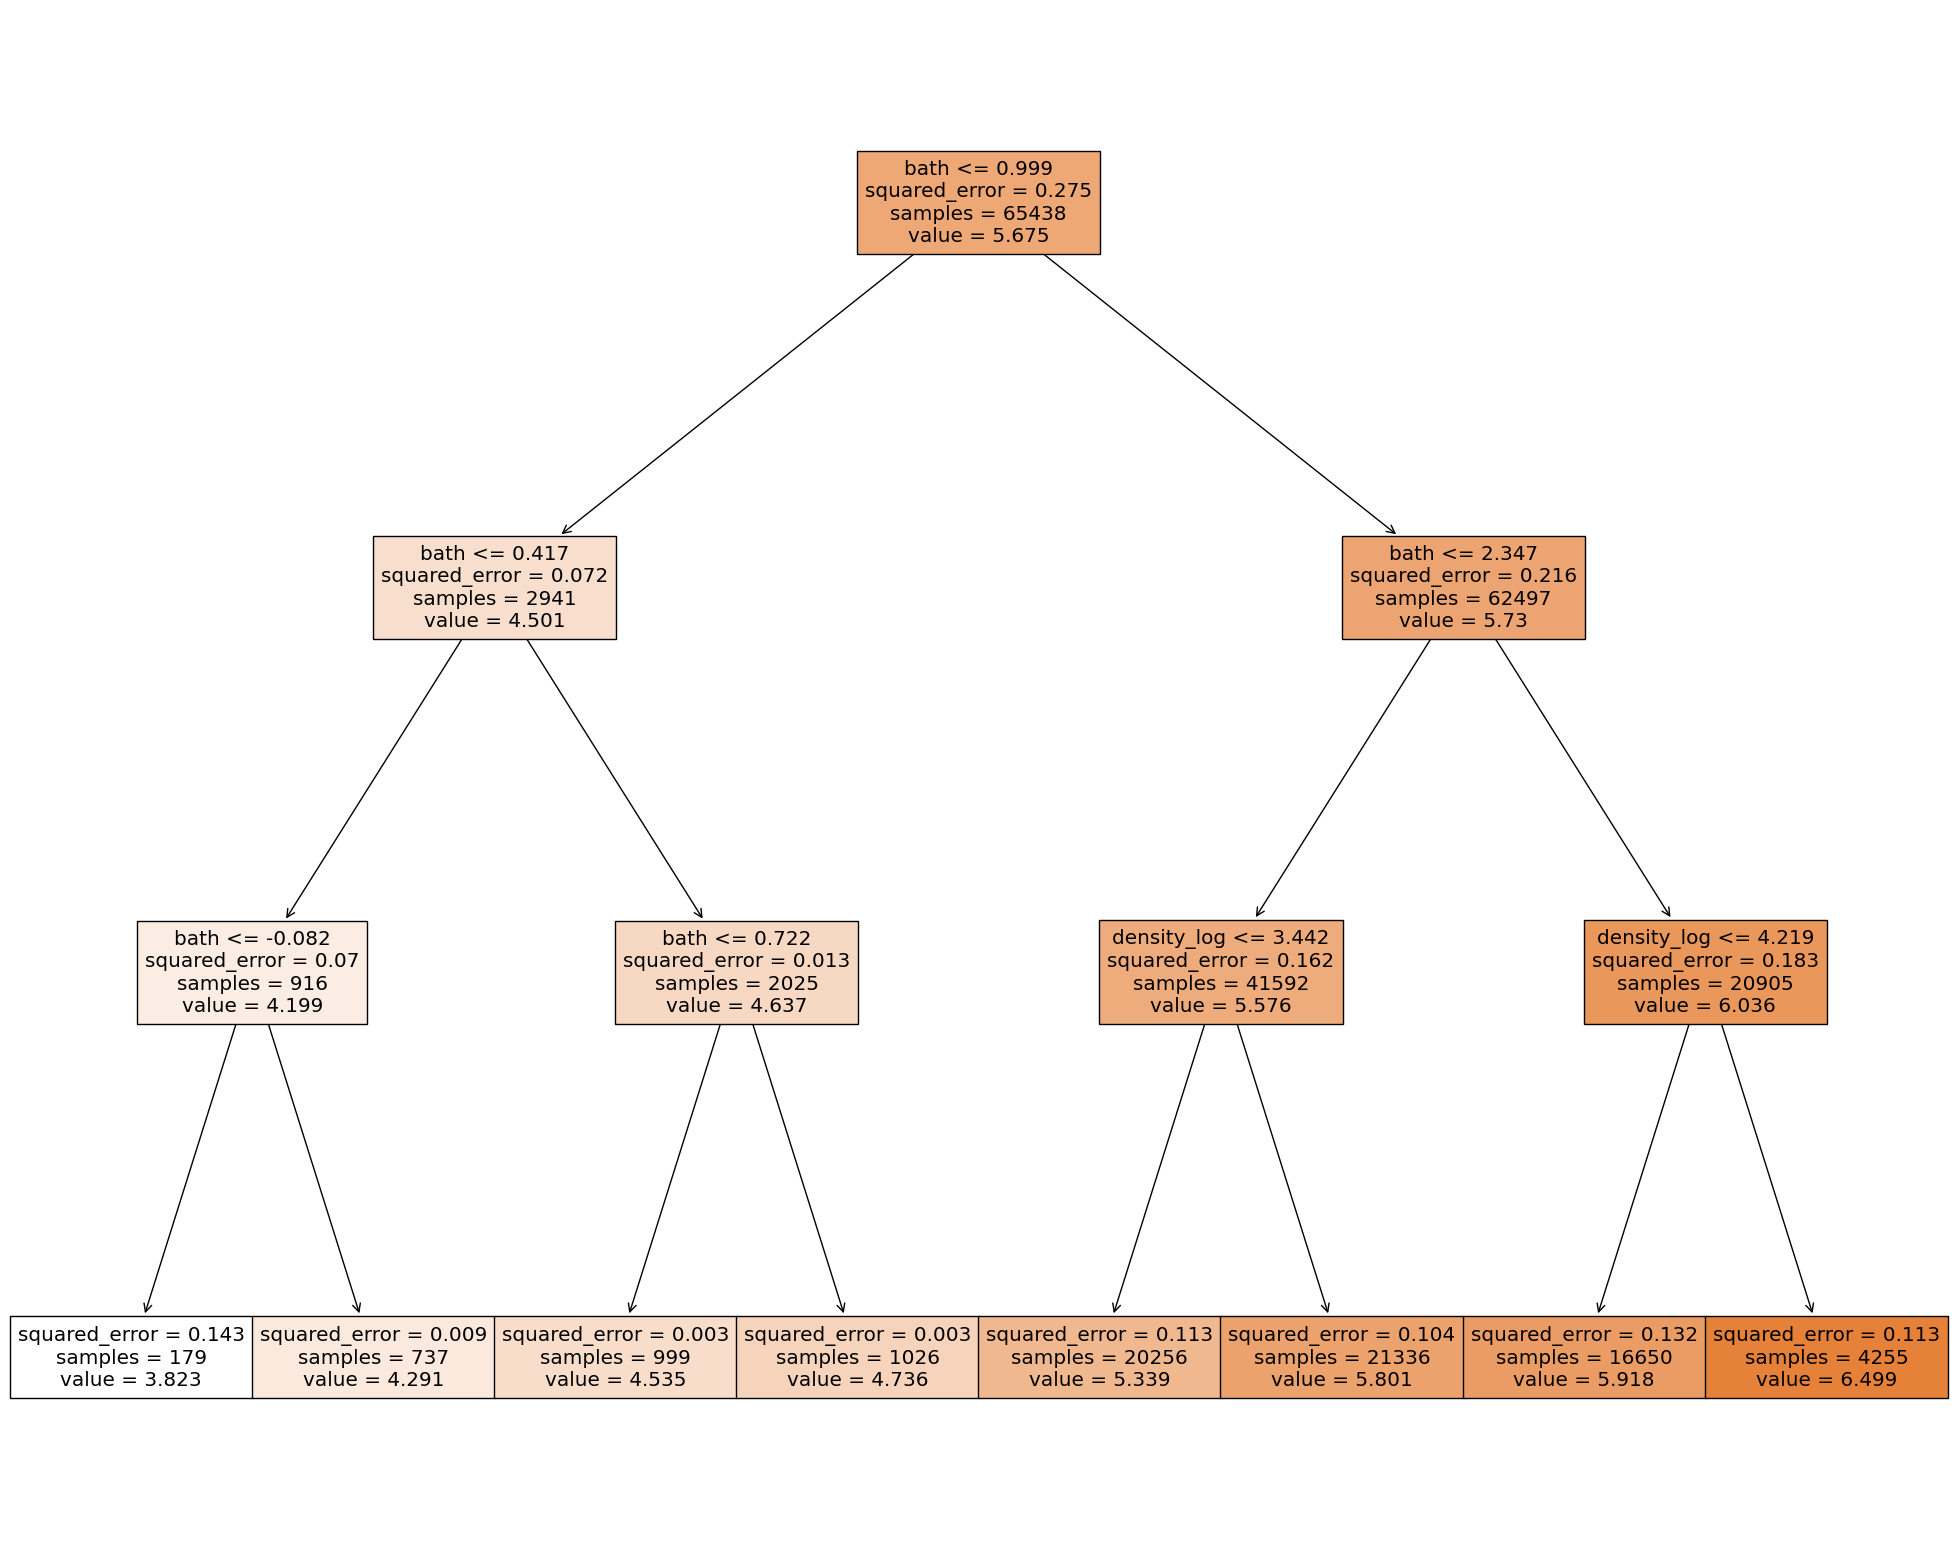

In [33]:
FRE_fig = plt.figure(figsize=(25,20))
FRE_fig = tree.plot_tree(FRE_tree, feature_names=FRE4_4X.columns, filled=True)

According to the regression tree, the `bath` covariate is highly impactful, as evidenced by the fact that the tree had chosen to split on that covariate at the first step, second step, and even half of the sections in the third step.  The value that the tree splits on does not make much sense, however, at least from an economic perspective.  The first step already split between houses with at least one bathroom and houses with no bathrooms;  yet step two continued to split the section of houses with no bathrooms further on the bathroom covariate.  Considering the fact that there were observations that had predicted values for bathroom counts, it makes sense statistically how the regression tree would decide to split the way it did.

### Random Forest

A regression tree alone will not guarantee an accurate analysis.  Like the OLS model, a regression tree is prone to bias and overfitting (*What is Random Forest?* n.d.).  The solution to this is the random forest model.

A random forest model is a culmination of multiple regression trees that are uncorrelated with each other.  How are they uncorrelated with each other?  Each decision tree will, at each step, only be able to split based off a *j* number of covariates, of which the selection is random.  In doing so, the different regression trees are effectively made uncorrelated with each other, which would solve the issue of bias and yield a more accurate analysis.

Random forest models are particularly useful in analyzing datasets with non-linear relationships (Biggs et al., 2022), which is what my dataset is.

The interpretation of the random forest model will be made below the table generated by the forest.

In [34]:
FRE_RF = RandomForestRegressor(max_features=3, random_state=1).fit(FRE4_4X, 
                                                                   FRE4_4Y)

In [35]:
pred = FRE_RF.predict(FRE4_4X)
mean_squared_error(FRE4_4Y, pred)

0.0029311606419836246

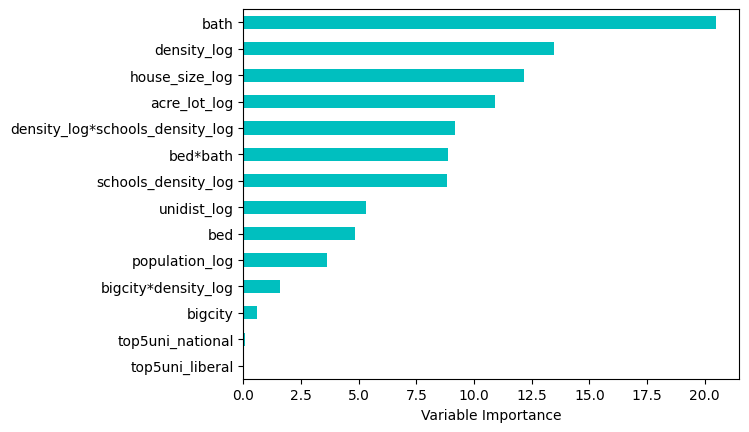

In [36]:
Importance = pd.DataFrame({'Importance':FRE_RF.feature_importances_*100}, 
                          index=FRE4_4X.columns)
Importance.sort_values('Importance', axis=0, ascending=True).plot(kind='barh', color='c', )
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

The random forest set up used here limited the amount of random variables to three.  The results showed the number of bathrooms to be the most important covariate, with the ZIP code density to be the next most important.  University proximity ranked behind public schools density and all the housing characteristics with the exception of `bed`.  The implication is that, after the housing characteristics themselves and ZIP code density, proximity to a university influences house prices the most.  However, the density of public schools has a greater influence.

### Random Forest for Data with University Covariates

Despite the comparatively much smaller amount of observations in the dataset that considers university level data, the extra covariates included in that dataset might still display interesting relationships that my final model did not display.

In [37]:
FRE4_3 = pd.read_csv("FRE4_3.csv")

In [39]:
FRE4_3X = FRE4_3[['unidist_log', 'bed', 'bath', 'bed*bath', 'acre_lot_log', 
                  'house_size_log', 'bigcity', 'population_log', 'density_log', 
                  'schools_density_log', 'bigcity*density_log', 
                  'density_log*schools_density_log', 'top5uni_national', 
                  'top5uni_liberal', 'Acceptance_Percent', 
                  'Estimated Avg GPA', 'Enrollment Log', 'Tuition_1000', 
                  'acceptance*gpa', 'gpa*tuition']].copy()
for col in list(FRE4_3X):
    FRE4_3X[col] = FRE4_3X[col].astype(float)
FRE4_3Y = FRE4_3['price_log'].copy()

In [40]:
FRE_alt_RF = RandomForestRegressor(max_features=3, random_state=1).fit(FRE4_3X, 
                                                                   FRE4_3Y)

In [41]:
pred = FRE_alt_RF.predict(FRE4_3X)
mean_squared_error(FRE4_3Y, pred)

0.0024906522073459545

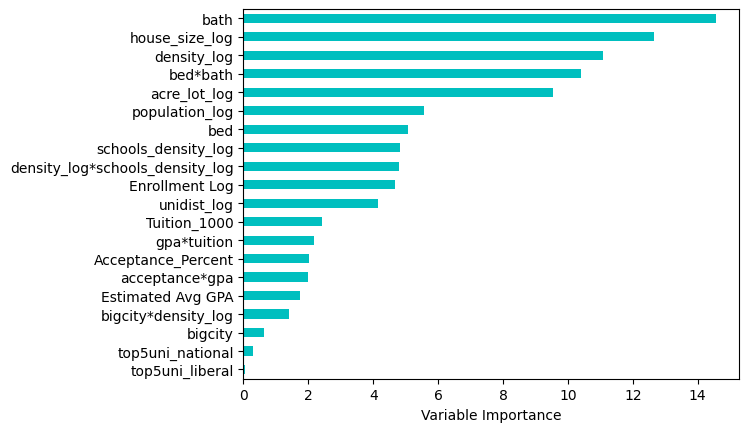

In [42]:
Importance = pd.DataFrame({'Importance':FRE_alt_RF.feature_importances_*100}, 
                          index=FRE4_3X.columns)
Importance.sort_values('Importance', axis=0, ascending=True).plot(kind='barh', 
                                                                  color='c', )
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

According to the random forest model results, the number of bathrooms remains the most influential variable in determining house prices, followed by various housing characteristics like house size.  Public schools density holds more influence than university proximity, which had been calculated to be slightly lower than the amount of enrollment at the given university.

---
# Conclusion


In **Part I**, I filtered the data to include New York state only, and cleaned the data of extreme outliers.  The outliers were cleaned due to the number of observations that make up the outliers (that is to say, not a lot.  At most 150 which, in the face of 60,000, is not much), the extremity of the outliers compared to the mean of the fields in the dataset, and the fact that large, opulent housings are simply not what university students would look for.

The dataset is not only positively skewed, it has several outliers that had initially skewed the summary statistics. Considering the typical housing market, this makes sense. Many houses are sold at comparatively low prices for the average middle-to-low class person, who represent a larger segment of the population. In contrast, the luxury real estate market, characterized by substantially higher prices, caters to a relatively smaller fraction of the upper class.  Additionally, I found a degree of correlation between house size and house prices, although the variation is heteroskedastic;  I found little impact of the acre size and house prices.  The majority of data points are in either New York City or "New York," which may be the area surrounding NYC.  This is unsurprising, as New York City houses an incredibly densely populated compared to the rest of New York state.

In **Part II**, the analysis sheds light on the intricate relationship between not only housing prices but the houses themselves and proximity to universities in New York.  Distance to nearest university has been chosen in light of the fact that such a variable has been incorporated into economic models on the effect of education on some other societal outcome, such as housing prices (Wang, 2023) and wages (Maluccio, 1998).

Because distance requires two points to calculate, ZIP code centroids were used in place of ZIP code shapefiles.  University latitude and longitude was obtained and used to calculate for the nearest university and distance for each given house.

Houses tended to form clusters around the universities, which themselves form clusters around major cities within New York.  Additionally, heteroskedastic variation could be observed in the relationship between university proximity and housing prices.  This suggests that proximity to universities may be a key factor influencing the distribution of residential properties within the studied area. presumably around cities.

Further analysis could explore the underlying drivers of this pattern, including factors such as accessibility to educational resources, employment opportunities, and neighborhood amenities. Understanding the dynamics of housing concentration in relation to university proximity can inform urban planning initiatives aimed at optimizing residential development, enhancing community livability, and promoting sustainable growth in the vicinity of educational institutions.

In **Part III**, I attempt to unearth these factors, which I aim to use as controls.  Using controls in economic analysis is an incredibly common but effective method to attempt to isolate specific effects of a variable.  In an analsyis on the effect of education on labor market earnings, David Card controlled for "institutional features" (2001).  Interpreting this as additional information on a university, I collected data for universities in New York to analyze.

In addition to university information, I also obtained information on public schools, which I analyzed together with my housing prices.  Analysis showed a weak positive relationship between the number of public schools in a ZIP code and the corresponding house prices.  There is also a stronger negative relationship between the number of public schools and distance to a university.  In both relationships, there exists a significantly higher variation in observations where there are less public schools in a ZIP code.  This indicates that the dataset that I have obtained may not be effective in controlling for the heteroskedastic relationship seen in Part II.

In **Part IV**, I take all the data synthesized in the previous parts to perform regression analysis.  I ultimately did two versions of the final regression:  one with university level data considered, and one without.  The reason for this is that university names were poorly matched, which meant that the version of the dataset with university level data would have far fewer observations than the complete dataset.

After running regressions, I utilize the random forest model to more accurately parse out the most influential variables on house price.  I will consider the full dataset with all observations to be the final model, but I still ran regressions and random forest analysis on the other version of the data to observe potential findings.

Regression results had found that all variables as well as the interaction terms had a significant impact on house price, which suggests not only correlation with house price but also inter-relation with each other.  The regression does not show significance beyond the 1% level, however, so there was no way to determine the most influential covariates.

The random forest analysis solves that dilemma and presents that the number of bathrooms holds the most influence out of all covariates on house price, followed by the population density within the house's ZIP code.  It is likely that the more dense the population is, the higher the demand is for houses in that area.  Behind housing characteristics, university proximity has been calculated to be the next most influential variable.

Conclusions about causal relationships remain inconclusive, however.  Ideally, an instrumental variable on university proximity should be done to capture the causal effect.  However, an instrumental variable could not be obtained for this paper.  Potential instrumental variables included "distance to nearest public transportation" or "distance to nearest grocery store or shopping center," but this data *has* to be calculated at a more precise level than ZIP code level.  I would have to know the exact house coordinates of every house, not the house's ZIP code centroid, as well as exact locations of all public transport or amenity.  If I were to obtain this data, the next step would definitely be to perform an instrumental variable analysis to determine the causal effect of university proximity on house price.

---
# Citations
- 2024 best colleges in New York | U.S. News Rankings. USNews. (n.d.). https://www.usnews.com/best-colleges/ny 
- Beretta, L., Santaniello, A. Nearest neighbor imputation algorithms: a critical evaluation. *BMC Med Inform Decis Mak* 16 (Suppl 3), 74 (2016). https://doi.org/10.1186/s12911-016-0318-z
- Biggs, M., Hariss, R., & Perakis, G. (2023). Constrained optimization of objective functions determined from random forests. *Production and Operations Management*, 32(2), 397-415. doi:10.1111/poms.13877
- Card, D. (2001). Estimating the return to schooling: Progress on some persistent econometric problems. Econometrica, 69(5), 1127–1160. https://doi.org/10.1111/1468-0262.00237 
- Celeux, G., & Diebolt, J. (1992). A stochastic approximation type EM algorithm for the mixture problem. *Stochastics and Stochastic Reports*, 41(1–2), 119–134. https://doi.org/10.1080/17442509208833797
- Eastern Suffolk BOCES. LinkedIn. (2024). https://www.linkedin.com/school/eastern-suffolk-boces/about/ 
- Jiang, W., Josse, J., & Lavielle, M. (2020). Logistic regression with missing covariates—Parameter estimation, model selection and prediction within a joint-modeling framework. *Computational Statistics & Data Analysis*, 145, 106907. doi:10.1016/j.csda.2019.106907
- Maluccio, J. A. (1998). Endogeneity of schooling in the wage function. IDEAS. https://ideas.repec.org/p/fpr/fcnddp/54.html 
- Perry, A. (2023, August 28). No room at the dorm: As college begins, some students are scrambling for housing. Forbes. https://www.forbes.com/sites/alexperry/2023/08/20/no-room-at-the-dorm-as-college-begins-some-students-are-scrambling-for-housing/?sh=439fa93631f5 
- Sirmans, G. S., Macpherson, D. A., & Zietz, E. N. (2005). The Composition of Hedonic Pricing Models. Journal of Real Estate Literature, 13(1), 3–43. http://www.jstor.org/stable/44103506
- Turner, A. (2024, February 7). UBC student commutes from Calgary -- cheaper than paying Vancouver Rent. British Columbia. https://bc.ctvnews.ca/ubc-student-commutes-from-calgary-cheaper-than-paying-vancouver-rent-1.6759116 
- Wang, B. (2023). The Effect of Proximity to Universities on House Prices after the COVID Outbreak. IDEAS. https://ideas.repec.org/a/gam/jjrfmx/v16y2023i3p167-d1085315.html 
- What is Random Forest?. IBM. (n.d.). https://www.ibm.com/topics/random-forest#:~:text=Random%20forest%20is%20a%20commonly,both%20classification%20and%20regression%20problems.
- Zietz, J., Zietz, E.N. & Sirmans, G.S. Determinants of House Prices: A Quantile Regression Approach. J Real Estate Finance Econ 37, 317–333 (2008). https://doi.org/10.1007/s11146-007-9053-7

## Datasets
- Aguayo, C. USA Public Schools [Data set]. Kaggle. https://www.kaggle.com/datasets/carlosaguayo/usa-public-schools/data
- CollegeSimply. (2024). 2024 best colleges in New York. https://www.collegesimply.com/colleges/new-york/ 
- Sakib, A. S. USA Real Estate Dataset [Data set]. Kaggle. https://www.kaggle.com/datasets/ahmedshahriarsakib/usa-real-estate-dataset
- SimpleMaps. United States Zip Codes Database [Data set]. Retrieved from https://simplemaps.com/data/us-zips
- U.S. Census Bureau. TIGER/Line Shapefiles, 2023 [Data set]. Retrieved from https://www2.census.gov/geo/tiger/TIGER2023/STATE/
- National Center for Education Statistics. IPEDS Data Center: College Navigator - University Latitude and Longitude Data [Data set]. Retrieved from https://nces.ed.gov/ipeds/datacenter/DataFiles.aspx?gotoReportId=7&sid=2b85ae93-b78a-423f-933c-cd095ac80c39&rtid=7
- World Cities Database. simplemaps. (n.d.). https://simplemaps.com/data/world-cities 